# Understanding Central Limit Theorem using Python Simulations

**Central Limit Theorem** states that, under certain conditions, the distribution of the sum (or average) of a large number of independent, identically distributed (i.i.d.) random variables will approximate a normal/Gaussian distribution, regardless of the underlying distribution of the individual variables.

Given a random variable $X$, and its mean ($\mu$) and variance ($\sigma^2$) as:

- $E\left[X\right]\equiv\mu$

- $\text{Var}(X)\equiv\sigma^2$
  
- $\text{Std}(X)\equiv\sigma$

For the sum of $n$ random variables $X_i$ with $i=1,2,...n$ ie $\sum_i^n X_i$, according to the CLT, as $n$ becomes large, the distribution of the sum approaches a normal distribution with mean $n.\mu$ and standard deviation $n\sigma^2$,

$$\text{as } \lim_{n\to\infty}, \sum_i^n X_i\sim N\left(n\mu, \sqrt{n}\sigma\right)$$

In terms of the average/mean of the $X_i$ ie $\bar{X}_n=\frac{1}{n}\sum_i^n X_i$, CLT can be stated mathematically as:

$$\text{as } \lim_{n\to\infty}, \bar{X}_n\sim N\left(\mu, \frac{\sigma}{\sqrt{n}}\right)$$

ie. the distribution of the mean $\bar{X}_n$ of $n$ i.i.d random variables approaches a normal distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$ as $n\to\infty$. 

Another way to put it is by standardizing the mean to:

$$Z_n=\frac{\bar{X}_n-\mu}{\sigma/\sqrt{n}}$$

With this transformation, CLT can be stated as,
$$\text{as } \lim_{n\to\infty}, Z_n\sim N\left(0,1\right)$$

i.e $Z_n$ approaches a standard normal distribution (centred around 0 with a standard deviation of 1) as $n\to\infty$.

The conditions required for CLT to hold true are:

1. The random variables $X_i$ must be independent, and identically distributed (i.i.d).
2. Variance must be finite ie $0<\text{Var}(X_i)<\infty$
3. We should have a large enough sample size. Typically $n\ge30$ is sufficient.

#### **Useful Simplifications**
    

1. Variance as expectation of square of random variable minus square of mean of random variable:
    
    $\text{Var}(X)=E\left[(X-\mu)^2\right]=E\left[X^2+\mu^2-2\mu X\right]=E\left[X^2\right]+\mu^2-2\mu.E\left[X\right]$
  
    $\Rightarrow\text{Var}(X)=E\left[X^2\right]-\mu^2\equiv\sigma^2$

2. Mean of sum $Z=X+Y$ where $X,Y$ are two i.i.d. random variables, each with $\mu$ as mean and $\sigma^2$ as variance:
   
    $E\left[ Z \right]=E\left[ X+Y \right]=E\left[X\right]+E\left[Y \right]= 2.\mu$

3. Variance of two i.i.d random variables ($X,Y$)  with $\mu$ as mean and $\sigma^2$ as variance:

    $\text{Var}(X+Y)=E\left[ (X+Y)^2 \right]-(E\left[X+Y\right])^2=E\left[X^2+Y^2+2XY \right]-(2.\mu)^2$

    $=E\left[X^2\right]+E\left[Y^2\right]+2E\left[XY\right]-4\mu^2=E\left[X^2\right]+E\left[Y^2\right]+2\mu^2-4\mu^2=E\left[X^2\right]+E\left[Y^2\right]-2\mu^2$
    
    $=(E\left[X^2\right]-\mu^2)+(E\left[Y^2\right]-\mu^2)$
    
    $\Rightarrow\text{Var}(X+Y)=\text{Var}(X)+\text{Var}(Y)=2.\sigma^2$

4. Given $X\sim (\mu,\sigma^2)$, we can extend the analysis to $n$ iid variables $X_i$ (and using the above results), we can see that for the sum $X_1+X_2+...+X_n=\sum_i^n X_i$, we have:

    $$E\left[\sum_i^n X_i\right] = n.\mu$$

    $$\text{Var}(\sum_i^n X_i) = n.\sigma^2$$

    $$\text{Std}(\sum_i^n X_i) = \sqrt{n}.\sigma$$

5. Given $X\sim (\mu,\sigma^2)$, we can extend the analysis to $n$ iid variables $X_i$ (and using the above results), we can see that for sample mean $\frac{1}{n}(X_1+X_2+...+X_n)=\sum_i^n X_i$, we have:

    $$E\left[\frac{1}{n}\sum_i^n X_i\right] = n.\mu$$

    $$\text{Var}(\frac{1}{n}\sum_i^n X_i) = \frac{\sigma^2}{n}$$

    $$\text{Std}(\frac{1}{n}\sum_i^n X_i) = \frac{\sigma}{\sqrt{n}}$$

Let us now get to the simulations to see CLT in action.

In [223]:
import numpy as np
import pandas as pd

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm # for qqplot

# 1. CLT for Sums

We will start by checking CLT in the case of sum of random variables.

## Dice Roll Simulations

Our first scenario will be that of a classic roll of dice. The random variable $X$ is defined as the number on the face of the dice after rolling it. Therefore $X$ can be any of the integers from 1 to 6. We will consider the cases when the die is unbiased (uniform probability) and couple of unbiased cases.

### Unbiased Die

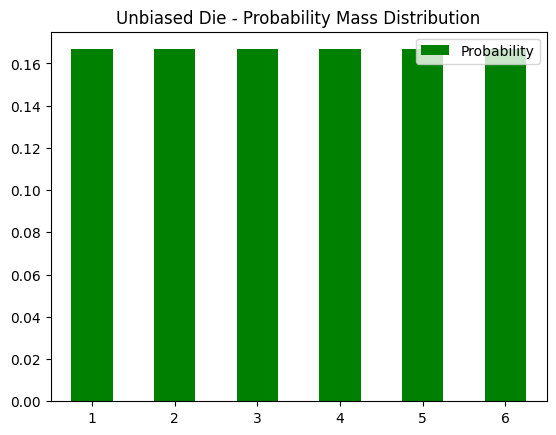

In [224]:
rolls=np.arange(1,7,dtype='int') # possible values for each roll
rolls_probability=np.array([1/6]*6) # probability mass function
mu=np.sum(rolls*rolls_probability)
variance=np.sum((rolls-mu)**2*rolls_probability)
sigma = np.sqrt(variance)

df=pd.DataFrame(data=rolls_probability,index=rolls, columns=['Probability'])
df.plot.bar(color='green')
plt.xticks(rotation=0)
plt.title('Unbiased Die - Probability Mass Distribution')
plt.show()

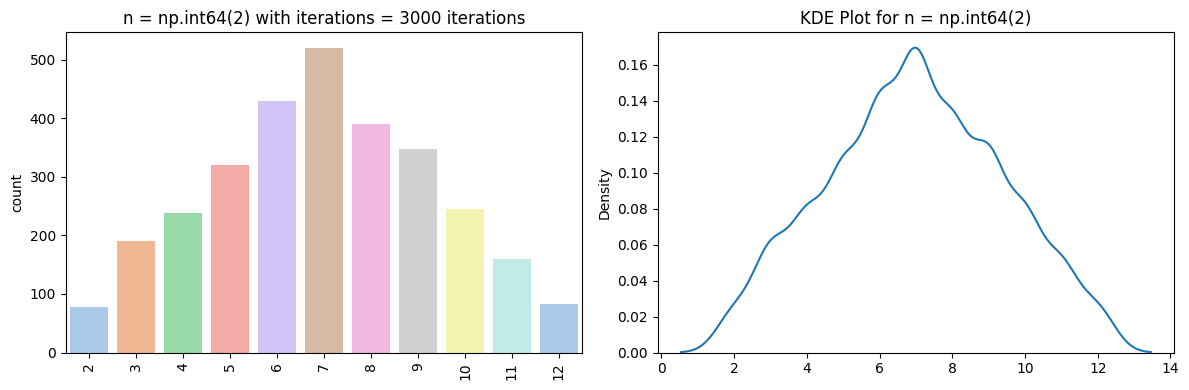

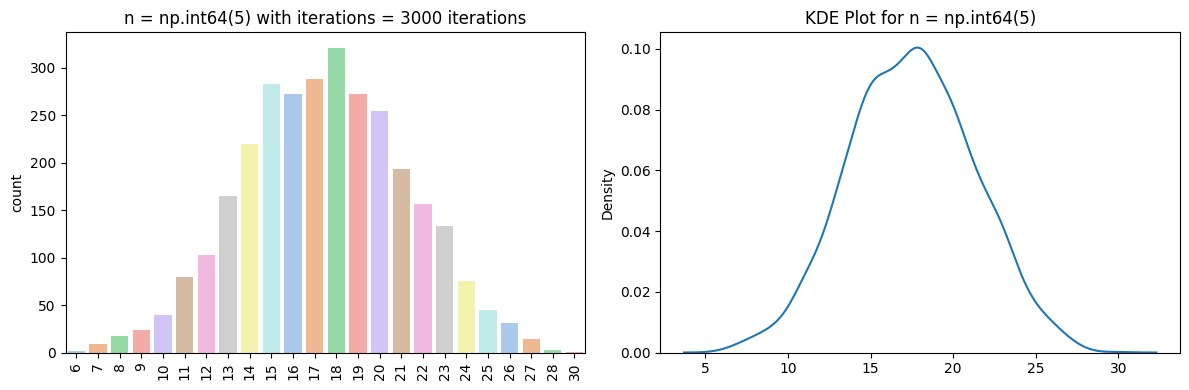

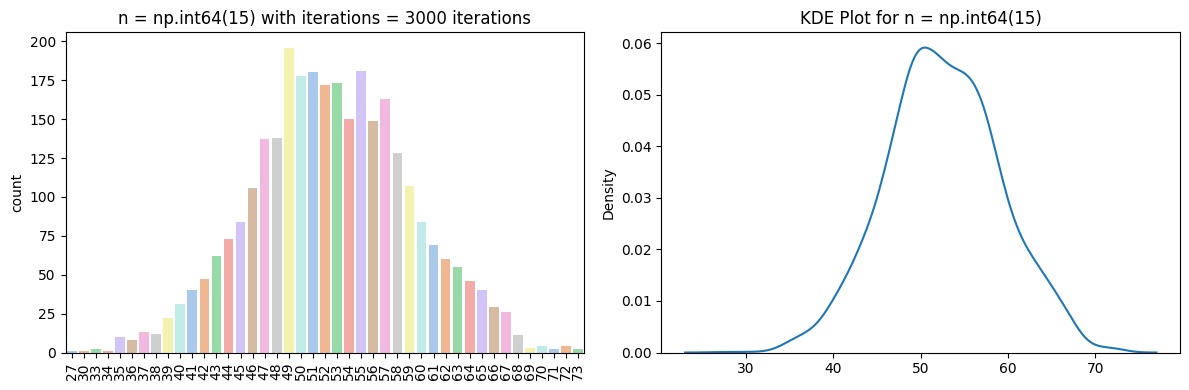

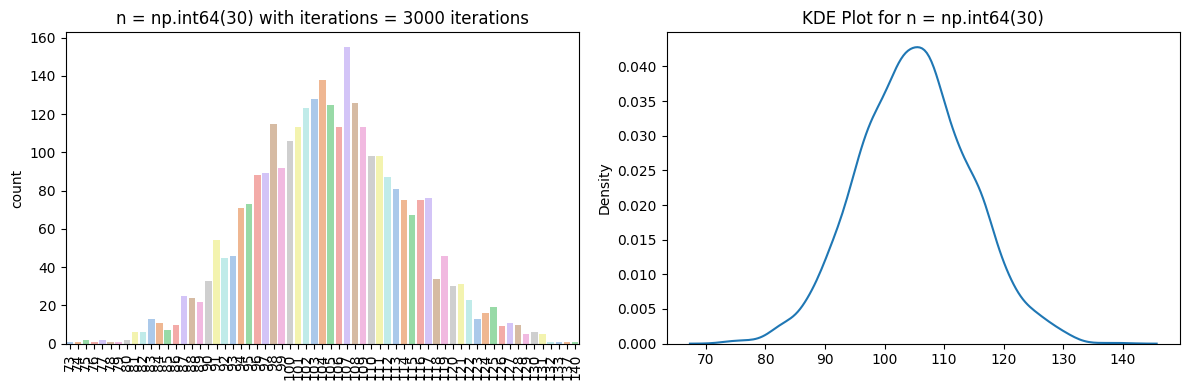

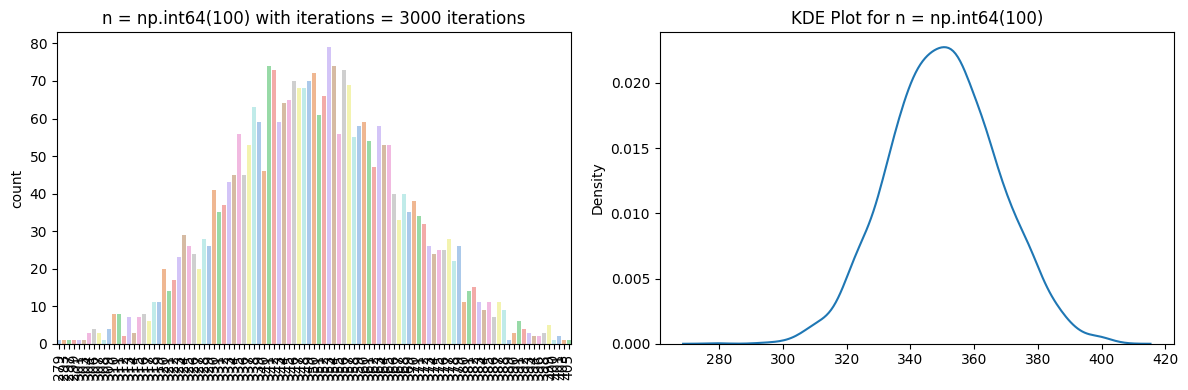

In [225]:
sample_sizes=np.array([2,5,15,30,100])
means=sample_sizes*mu
iterations=3000
for n in sample_sizes:
    sums=np.array([np.random.choice(a=rolls,size=n,p=rolls_probability).sum() for _ in range(iterations)])
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    sns.countplot(x=sums,hue=sums, palette='pastel', legend=False)
    plt.title(f"{n = } with {iterations = } iterations")
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.kdeplot(x=sums)
    plt.title(f"KDE Plot for {n = }")
    plt.tight_layout()
    plt.show()

### Biased Die - 1

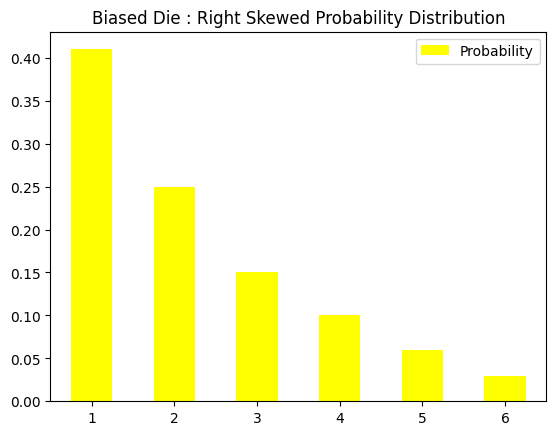

In [226]:
rolls=np.arange(1,7,dtype='int')
rolls_probability=np.array([0.41,0.25,0.15,0.1,0.06,0.03]) 

df=pd.DataFrame(data=rolls_probability,index=rolls, columns=['Probability'])
df.plot.bar(color='yellow')
plt.xticks(rotation=0)
plt.title('Biased Die : Right Skewed Probability Distribution')
plt.show()

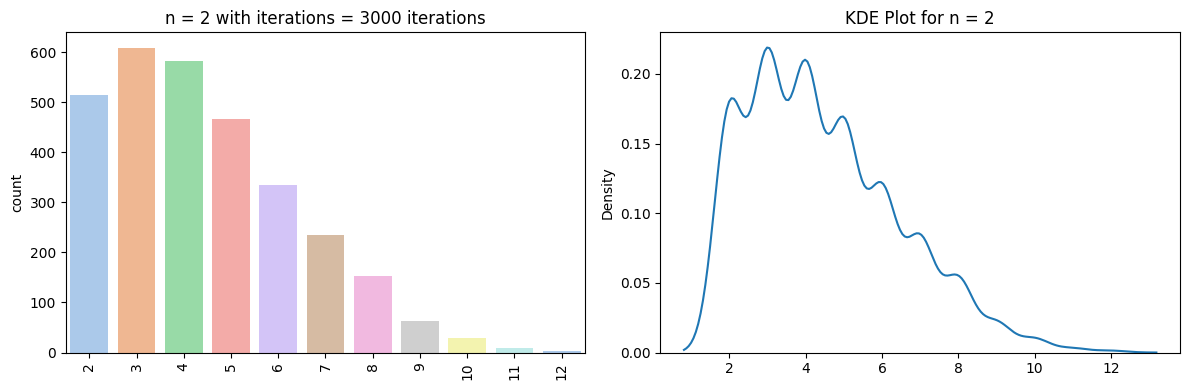

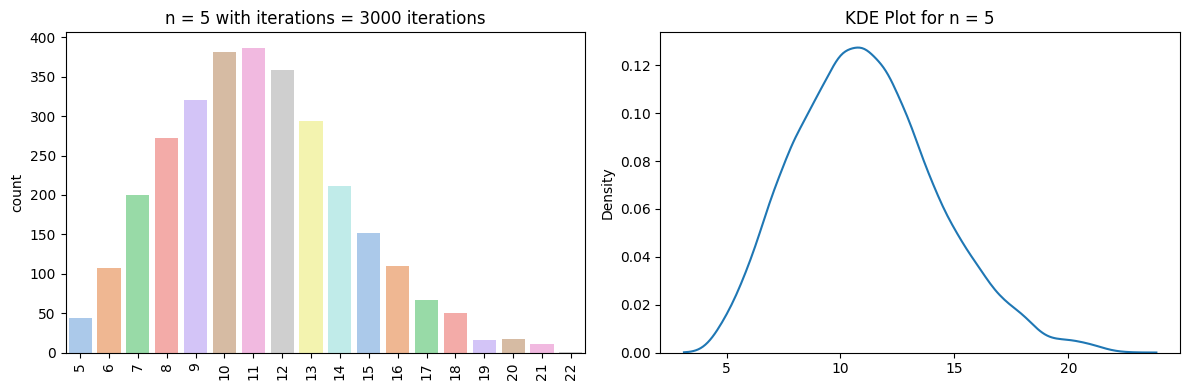

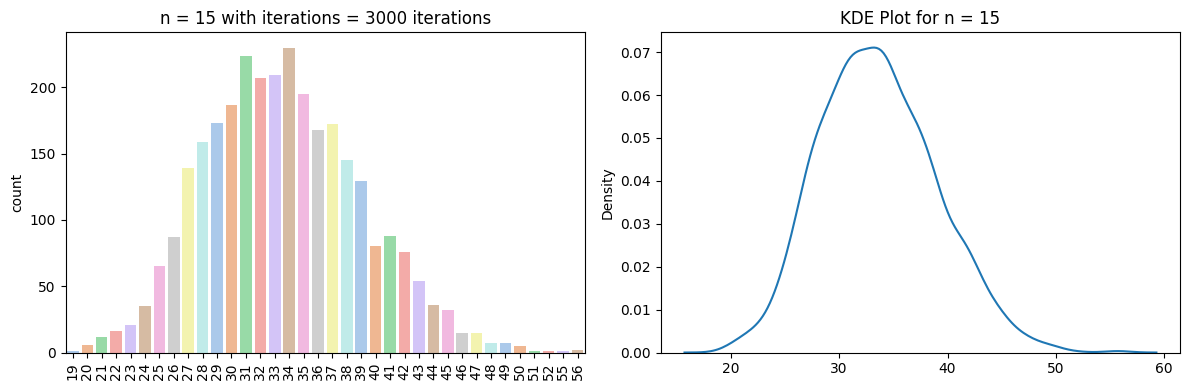

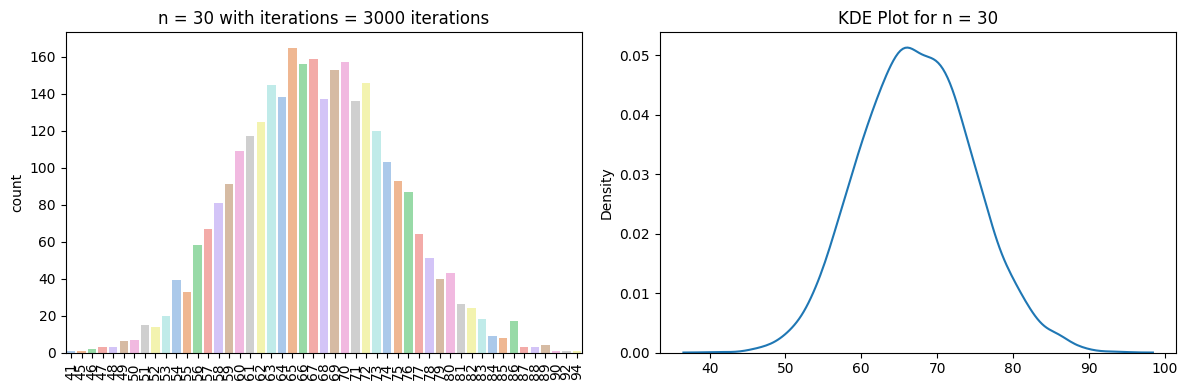

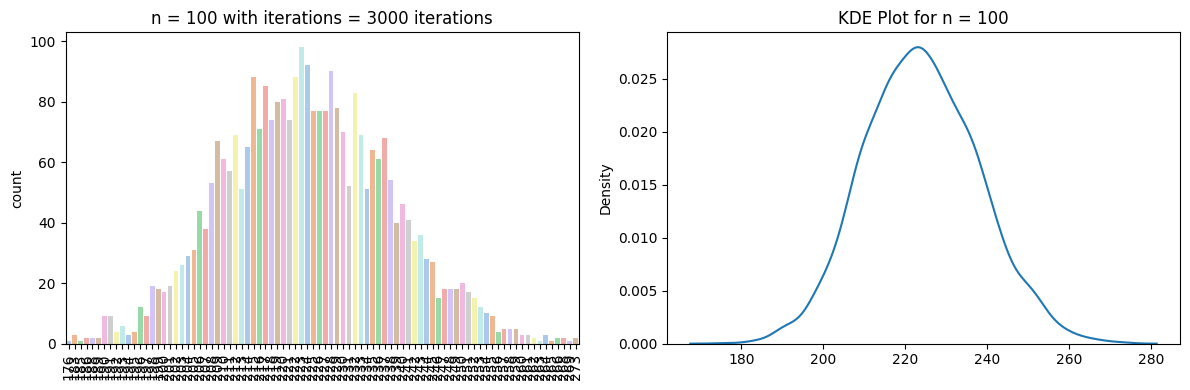

In [227]:
sample_sizes=[2,5,15,30,100]
iterations=3000
for n in sample_sizes:
    sums=np.array([np.random.choice(a=rolls,size=n,p=rolls_probability,replace=True).sum() for _ in range(iterations)])
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    sns.countplot(x=sums,hue=sums, palette='pastel', legend=False)
    plt.title(f"{n = } with {iterations = } iterations")
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.kdeplot(x=sums)
    plt.title(f"KDE Plot for {n = }")
    plt.tight_layout()
    plt.show()

### Biased Die - 2

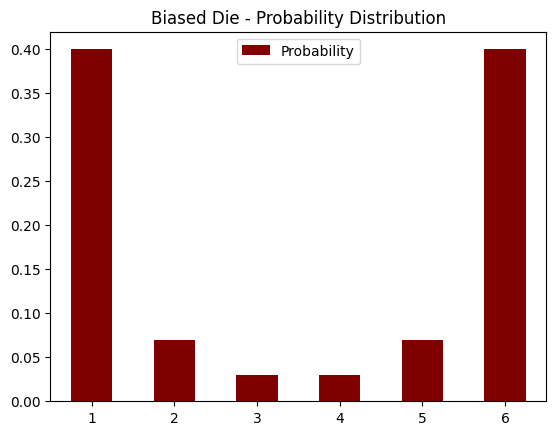

In [228]:
rolls=np.arange(1,7,dtype='int')
rolls_probability=np.array([0.40,0.07,0.03,0.03,0.07,0.4])

df=pd.DataFrame(data=rolls_probability,index=rolls, columns=['Probability'])
df.plot.bar(color='maroon')
plt.xticks(rotation=0)
plt.title('Biased Die - Probability Distribution')
plt.show()

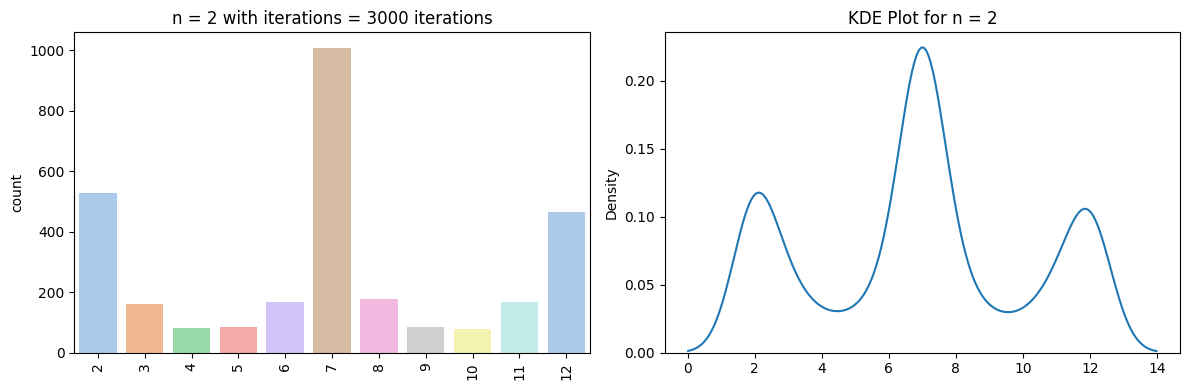

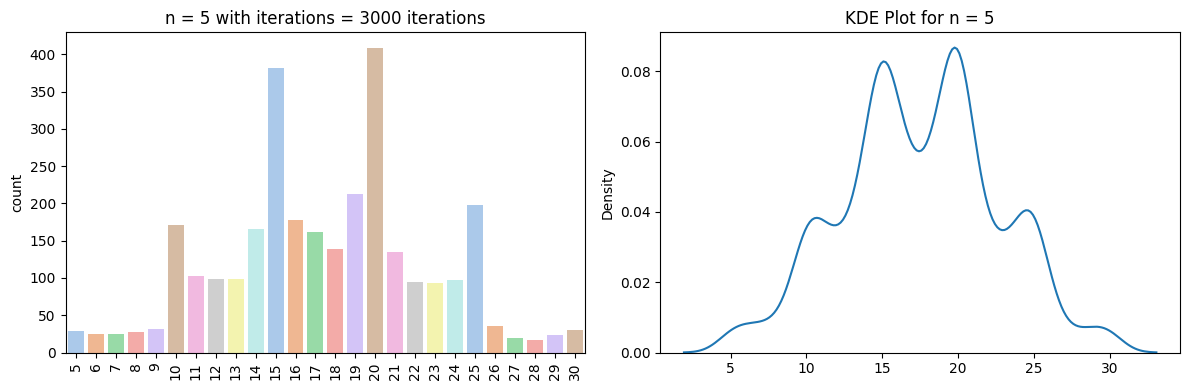

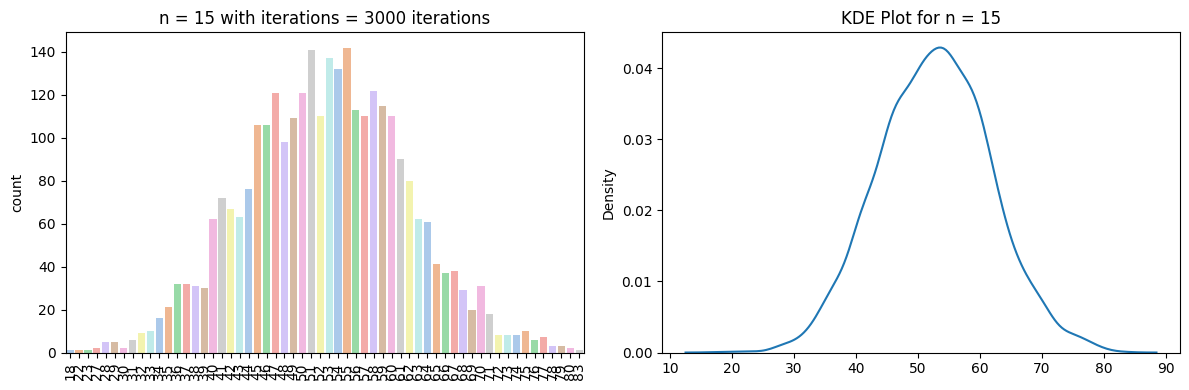

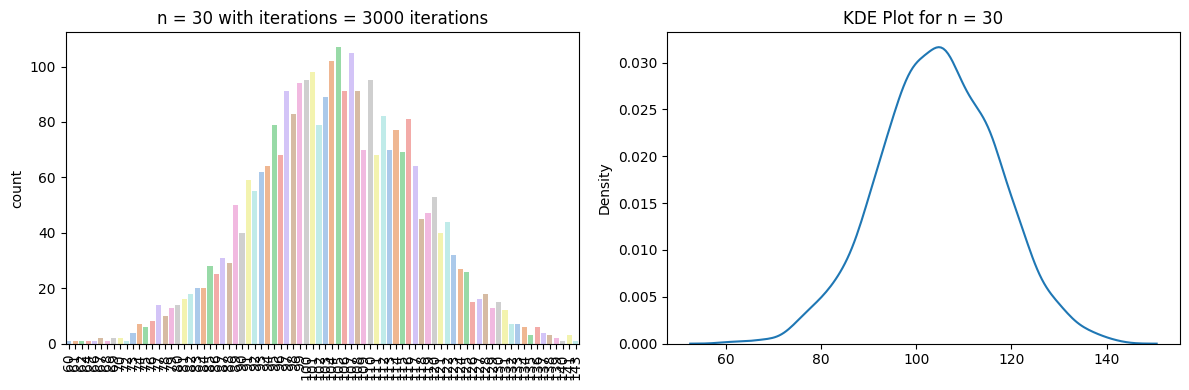

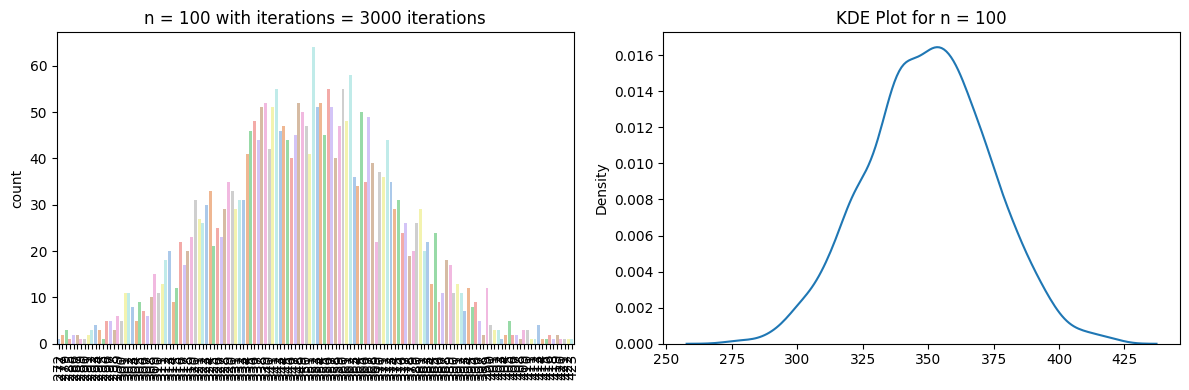

In [229]:
sample_sizes = [2,5,15,30,100]
iterations = 3_000

for n in sample_sizes:
    sums=np.array([np.random.choice(a=rolls,size=n,p=rolls_probability,replace=True).sum() for _ in range(iterations)])
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    sns.countplot(x=sums,hue=sums, palette='pastel', legend=False)
    plt.title(f"{n = } with {iterations = } iterations")
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.kdeplot(x=sums)
    plt.title(f"KDE Plot for {n = }")
    plt.tight_layout()
    plt.show()

Thus, it is clear that regardless of the original probabilities for the single coin (ie the distribution of random variable $X$), we are able to see that the distribution of the sums tend to follow a gaussian distribution as the number of dice increase (ie how many are in the sum). 

But if you look carefully at the KDE plots (which are smoothened approximations) for the distributions, the scales are changing for each $n$ ie the mean and spreads are varying. This is fully expected: as $n$ increases so will the mean ($\mu$) and spread ($\sigma$). We can standardize everything to have a better understanding of the distributions as well as how increasing $n$ impacts the mean and spread of the sums distribution.

### Standardized Distributions

Till now, what you saw was the plotting of the distribution sums as it is. Now instead of $\sum X_i$ let us try to plot the standardized version:

$$\frac{\sum X_i - n.\mu}{\sigma\sqrt{n}}$$ 

where $X_i = X, \mu, \sigma, n$ are the random variable, mean and standard deviation of the distribution of the random variable $X$ and sample size respectively. This allows us to plot the rescaled distribution which has a mean of 0 and standard deviation of 1 ie it follows the standard normal distribution.

Specifically, here we have:
- $X$ : the result of a single die roll.
- $\mu$ : expectation value (mean) of a single die roll.
- $\sigma^2$: variance of a single die roll distribution ($\text{var}(X)$) 
- $\sigma$ : standard deviation of a single die roll.
- $n$ : number of dice being rolled

Also, we can immediately surmise the following for n dice being rolled:

$$\mu_n =  E\left[\sum_i^n X_i\right]= \sum_i^n E\left[X_i\right]= n\mu$$
$$\sigma^2_n \equiv \text{var}(\sum_i^n X_i)=\sum_i^n \text{var}(X_i)=n\times\sigma^2 \Rightarrow \sigma_n = \sqrt{n}\sigma$$

Apart from the KDE plot, we will also use QQ plot (from `statsmodels` library) to better visualize the normality of the distribution.



First we plot this standardized distributions of the sums for the unbiased case:

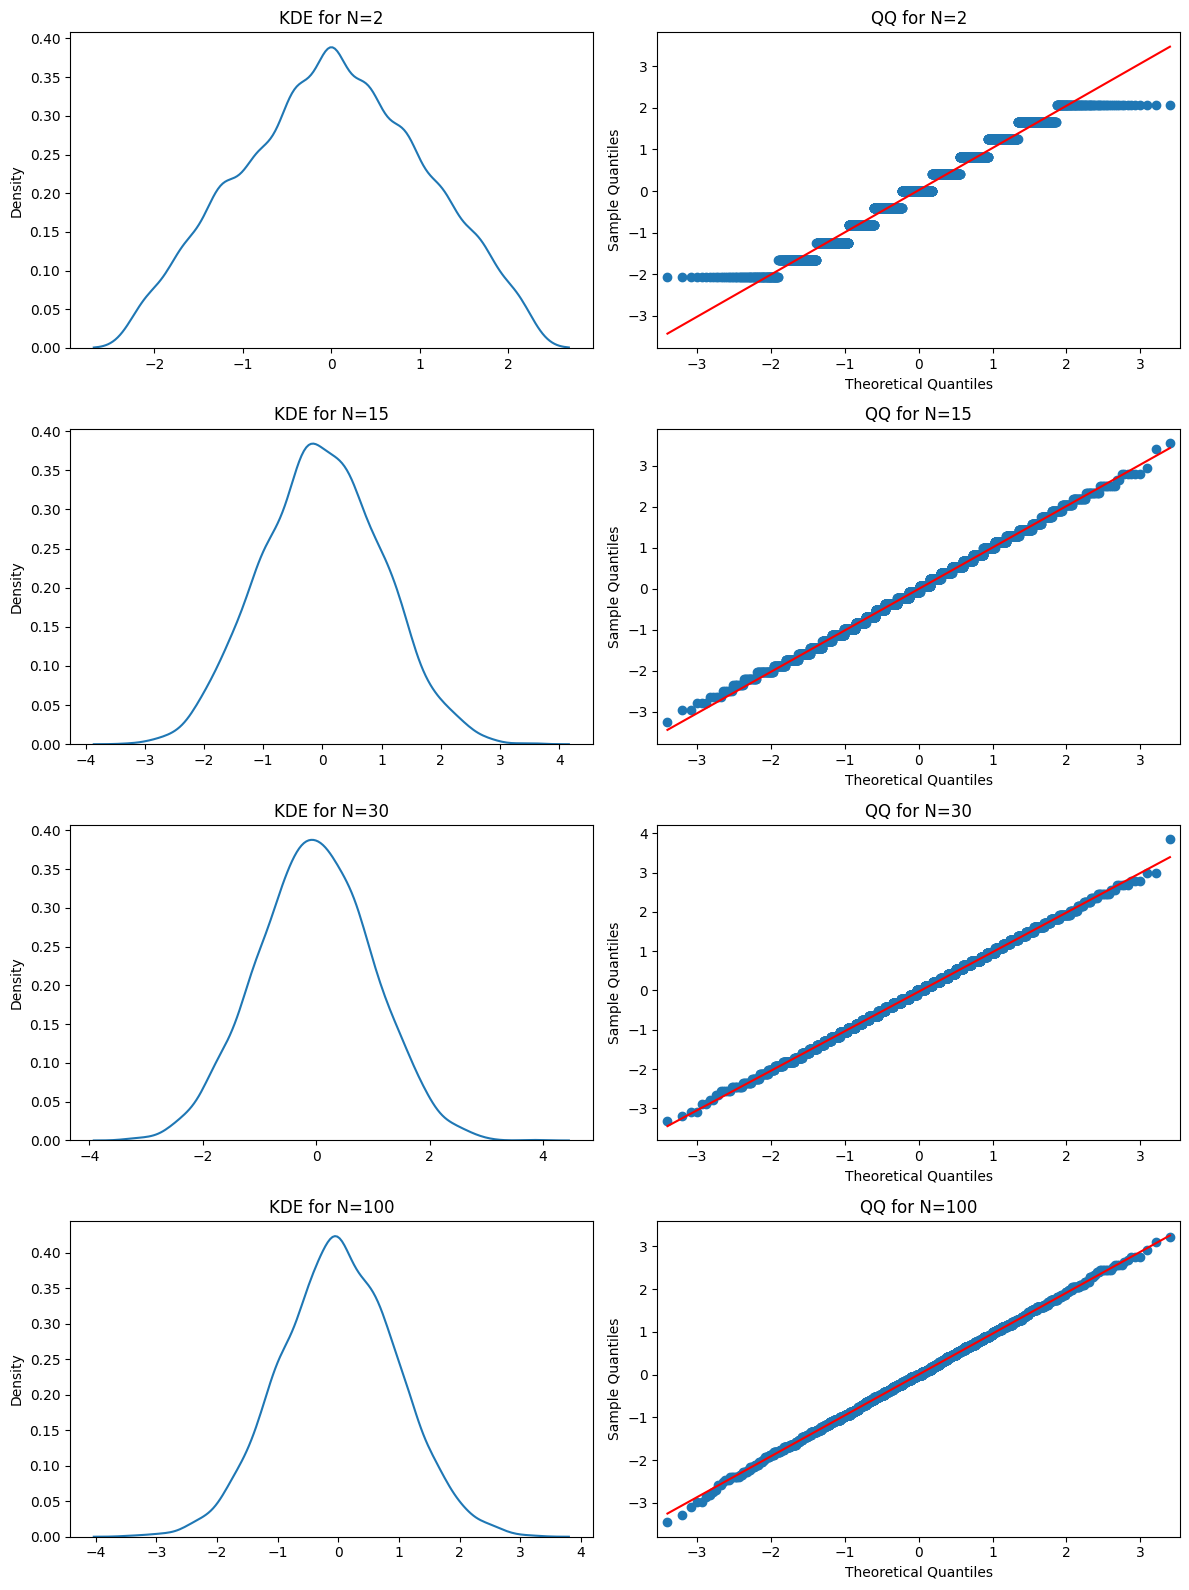

In [230]:
rolls=np.arange(1,7,dtype='int') # possible values for each roll
rolls_probability=np.array([1/6]*6) # probability mass function
mu=np.sum(rolls*rolls_probability)
variance=np.sum((rolls-mu)**2*rolls_probability)
sigma = np.sqrt(variance)

sample_sizes=np.array([2,15,30,100],dtype='int')
means=sample_sizes*mu
sigmas = np.sqrt(sample_sizes)*sigma

iterations=3000

fig, axes = plt.subplots(len(sample_sizes),2,figsize=(12, 16))

for i,N in enumerate(sample_sizes):
    sums=np.array([((np.random.choice(a=rolls,size=N,p=rolls_probability,replace=True).sum()-means[i])/sigmas[i]) for _ in range(iterations)])
    sns.kdeplot(x=sums,ax=axes[i][0])
    sm.qqplot(sums,line='s',ax=axes[i][1])
    axes[i][0].set_title(f"KDE for N={N}")
    axes[i][1].set_title(f"QQ for N={N}")
    
plt.tight_layout()
plt.show()

We see that the normality is more and more well established as n increases. This is evident both from the KDE plot as well as the QQ plots.

Now we plot for the biased cases:

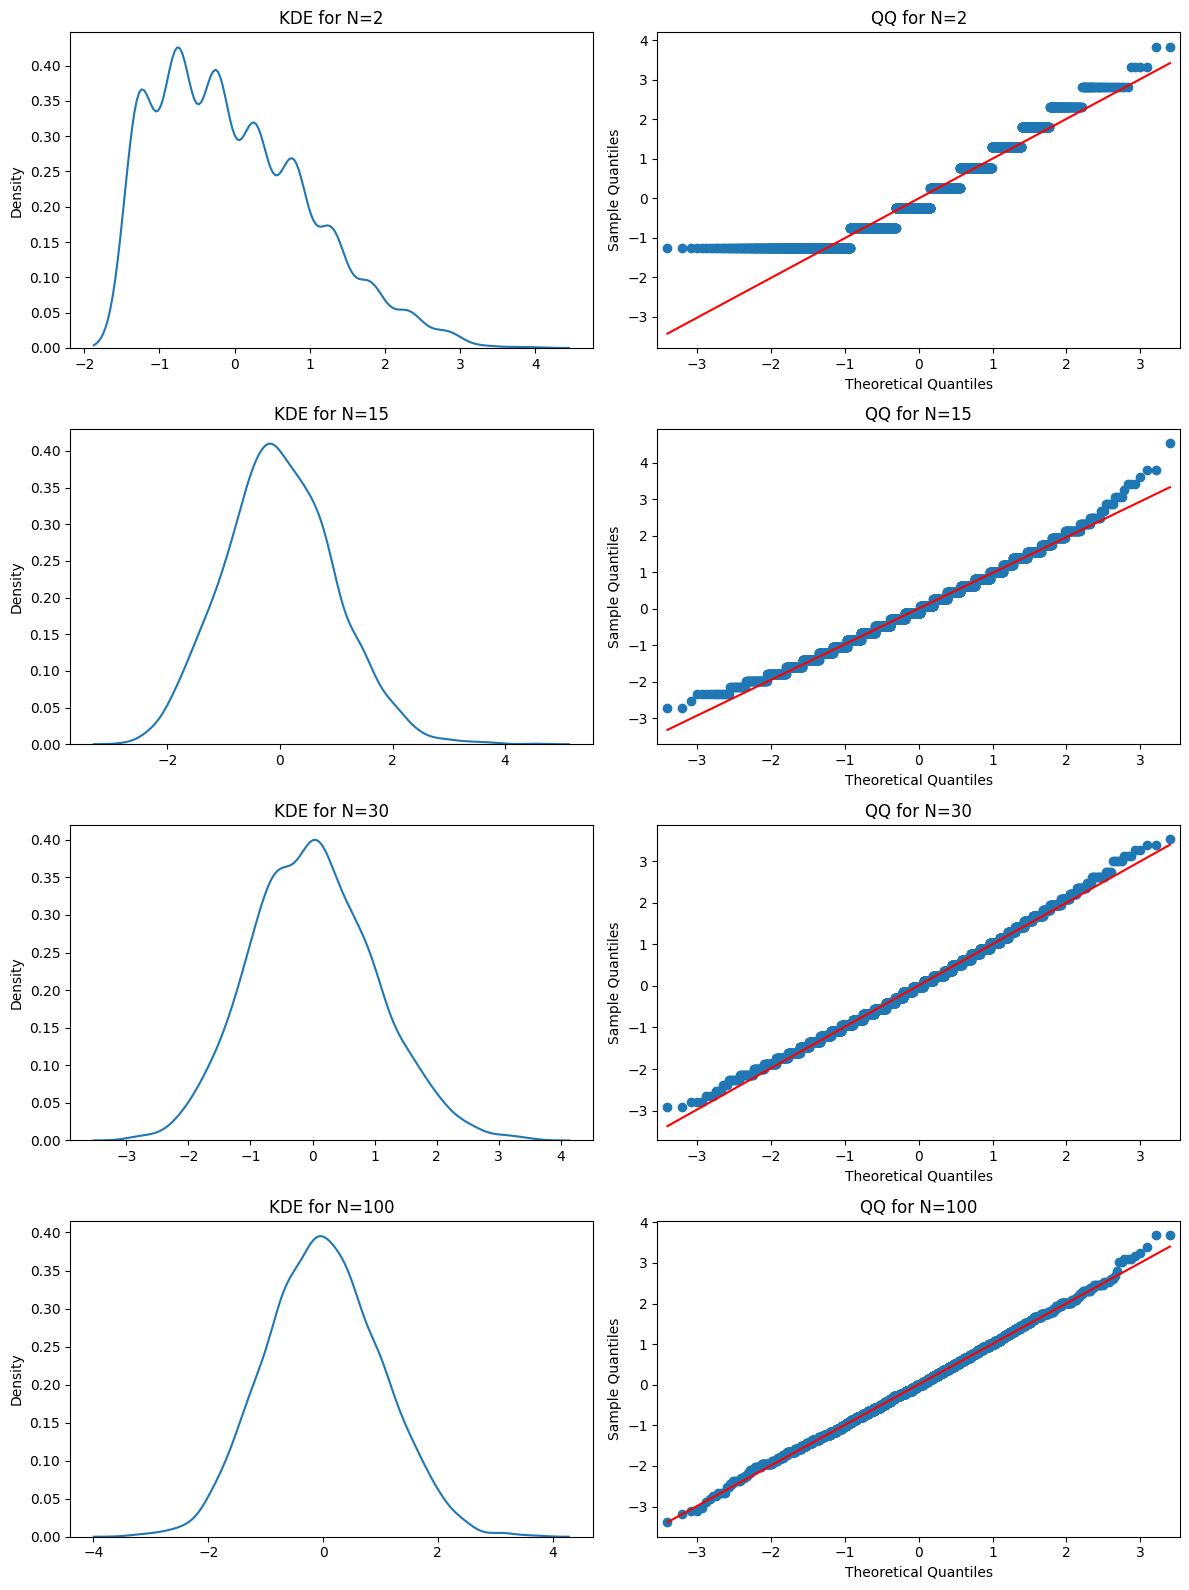

In [231]:
rolls=np.arange(1,7,dtype='int')
rolls_probability=np.array([0.41,0.25,0.15,0.1,0.06,0.03]) #right skewed pmf
mu=np.sum(rolls*rolls_probability)
variance=np.sum((rolls-mu)**2*rolls_probability)
sigma = np.sqrt(variance)

sample_sizes=np.array([2,15,30,100],dtype='int')
means=sample_sizes*mu
sigmas = np.sqrt(sample_sizes)*sigma

iterations=3000

fig, axes = plt.subplots(len(sample_sizes),2,figsize=(12, 16))

for i,N in enumerate(sample_sizes):
    sums=np.array([((np.random.choice(a=rolls,size=N,p=rolls_probability,replace=True).sum()-means[i])/sigmas[i]) for _ in range(iterations)])
    sns.kdeplot(x=sums,ax=axes[i][0])
    sm.qqplot(sums,line='s',ax=axes[i][1])
    axes[i][0].set_title(f"KDE for N={N}")
    axes[i][1].set_title(f"QQ for N={N}")
    
plt.tight_layout()
plt.show()

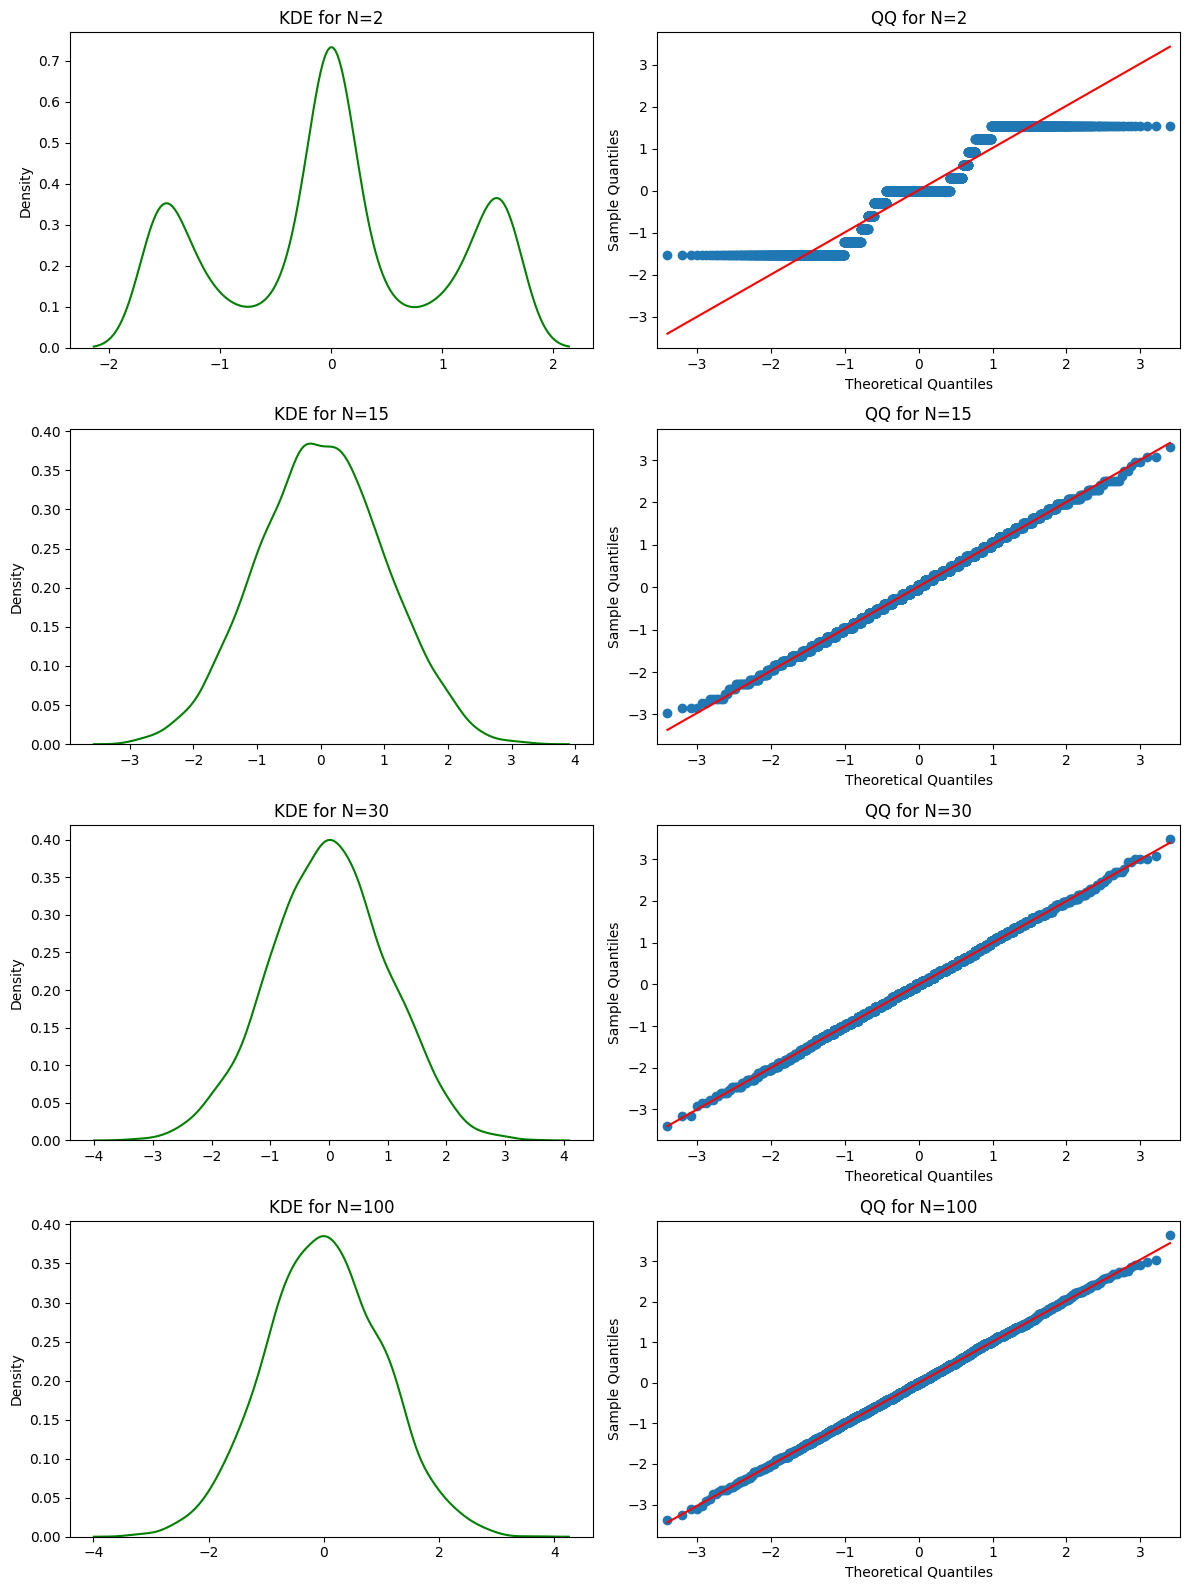

In [232]:
rolls=np.arange(1,7,dtype='int')
rolls_probability=np.array([0.40,0.07,0.03,0.03,0.07,0.4])
mu=np.sum(rolls*rolls_probability)
variance=np.sum((rolls-mu)**2*rolls_probability)
sigma = np.sqrt(variance)

sample_sizes=np.array([2,15,30,100],dtype='int')
means=sample_sizes*mu
sigmas = np.sqrt(sample_sizes)*sigma

iterations=3000

fig, axes = plt.subplots(len(sample_sizes),2,figsize=(12, 16))

for i,N in enumerate(sample_sizes):
    sums=np.array([((np.random.choice(a=rolls,size=N,p=rolls_probability,replace=True).sum()-means[i])/sigmas[i]) for _ in range(iterations)])
    sns.kdeplot(x=sums,ax=axes[i][0],color='g')
    sm.qqplot(sums,line='s',ax=axes[i][1])
    axes[i][0].set_title(f"KDE for N={N}")
    axes[i][1].set_title(f"QQ for N={N}")
    
plt.tight_layout()
plt.show()

We see that as $n$ becomes large (especially as it is larger than 30) the standardized distributions are also following normal distributions that are centred around 0 (ie mean is 0) and having a standard deviation of 1.

## Coin Toss Simulations

Let us count the number of Heads we get when tossing $n$ coins. $n$ = 2,5,15,30 and for 3_000 iterations. 

We will consider the following cases: Unbiased coin (50% each for Head and Tail) and Biased coins (80% Head 20% Tail and viceversa)

### Unbiased Coin

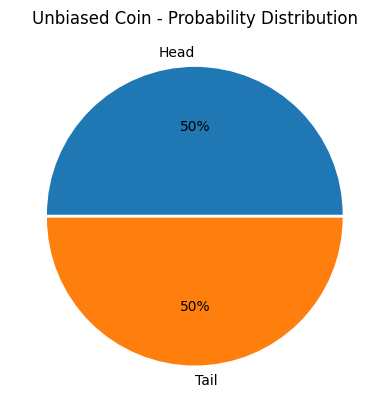

In [233]:
tosses = [1,0] # 1 --> H, 0 --> T
coin_probability = [0.5]*2 # probability mass function

plt.pie(x=coin_probability, labels='Head Tail'.split(), autopct='%1.0f%%',explode=[0.01, 0.01])
plt.title('Unbiased Coin - Probability Distribution')
plt.show()

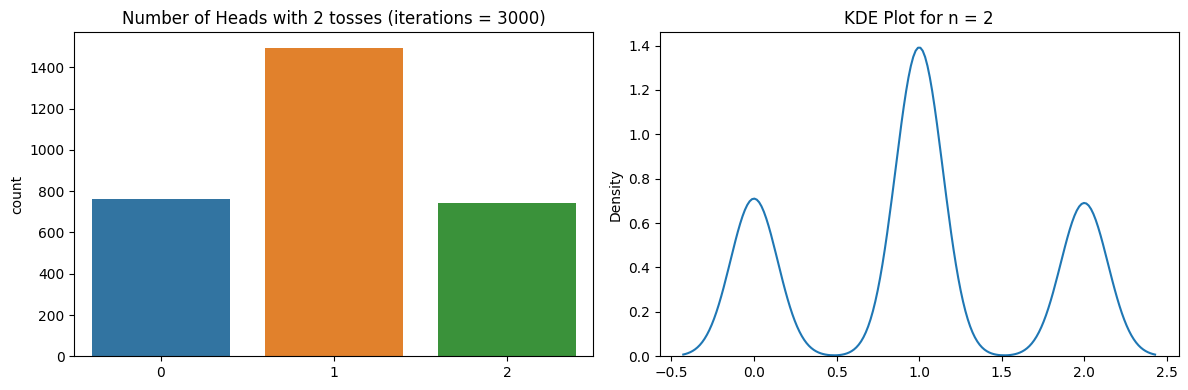

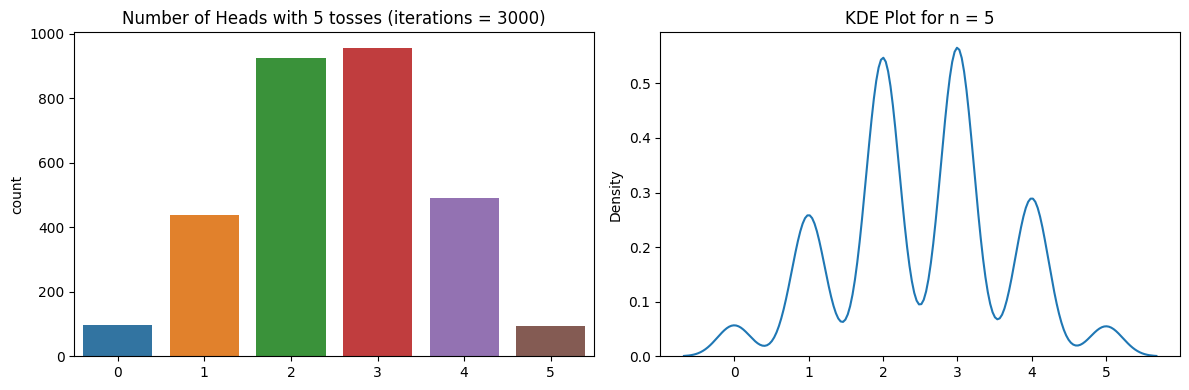

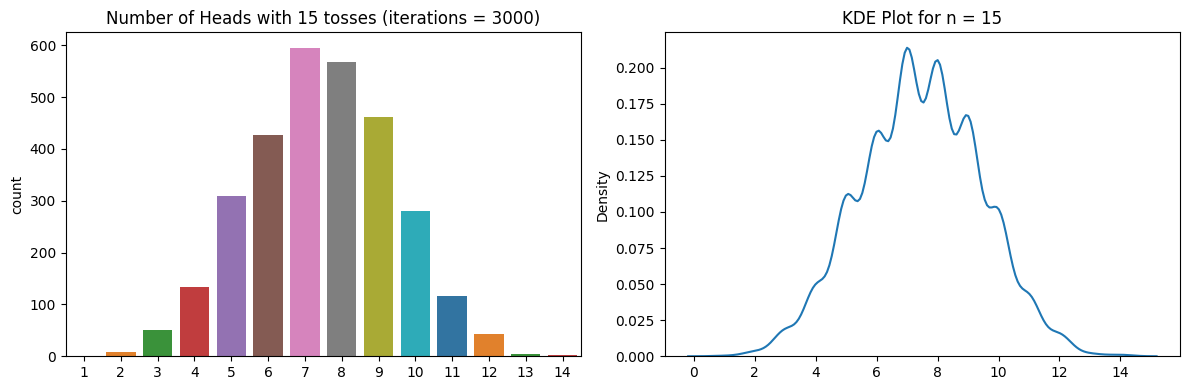

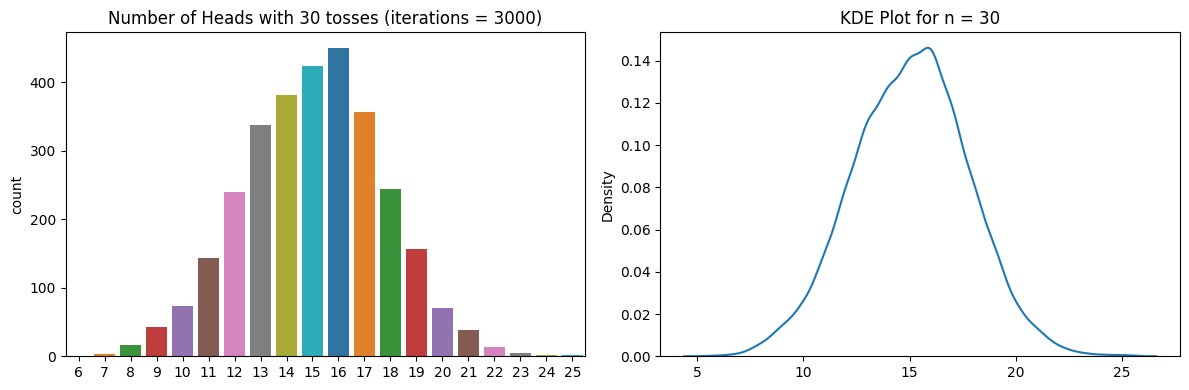

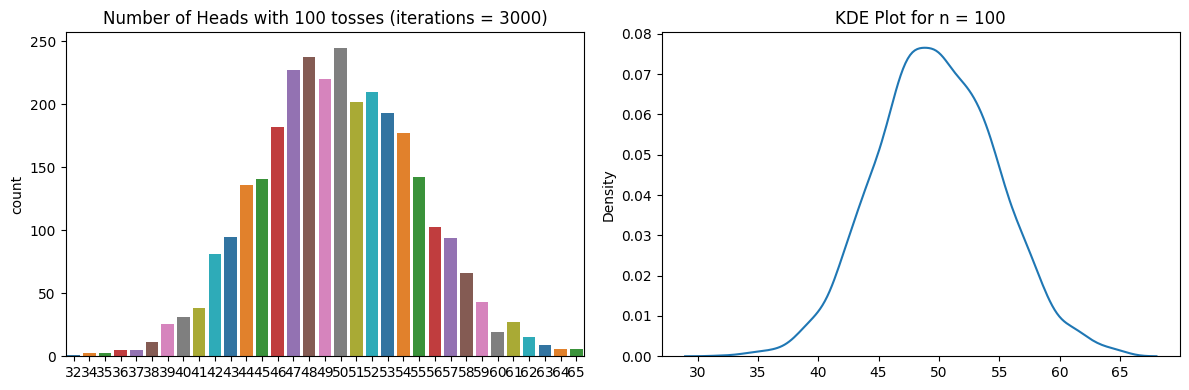

In [234]:
sample_sizes = [2,5,15,30,100]
iterations = 3_000

for n in sample_sizes:
    number_of_heads=[np.sum(np.random.choice(a=tosses,size=n,p=coin_probability)) for _ in range(iterations)]
    fig,axes=plt.subplots(1,2,figsize=(12,4))
    sns.countplot(x=number_of_heads,ax=axes[0],hue=number_of_heads,palette='tab10',legend=False)
    axes[0].set_title(f'Number of Heads with {n} tosses ({iterations = })')
    axes[1].set_title(f'KDE Plot for {n = }')
    sns.kdeplot(x=number_of_heads,ax=axes[1])
    plt.tight_layout()
    plt.show()
    

### Biased Coin - 1

P(Head) = 0.8

P(Tail) = 0.2

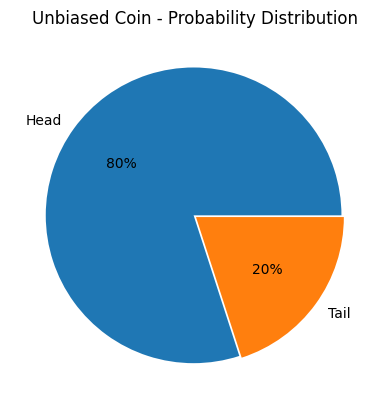

In [235]:
tosses = [1,0] # 1 --> H, 0 --> T
coin_probability = [0.8,0.2]

plt.pie(x=coin_probability, labels='Head Tail'.split(), autopct='%1.0f%%',explode=[0.01, 0.01])
plt.title('Unbiased Coin - Probability Distribution')
plt.show()

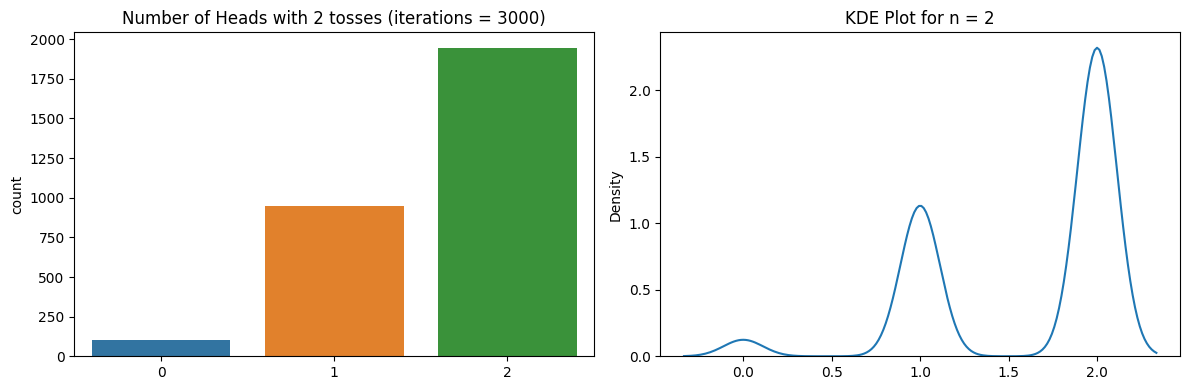

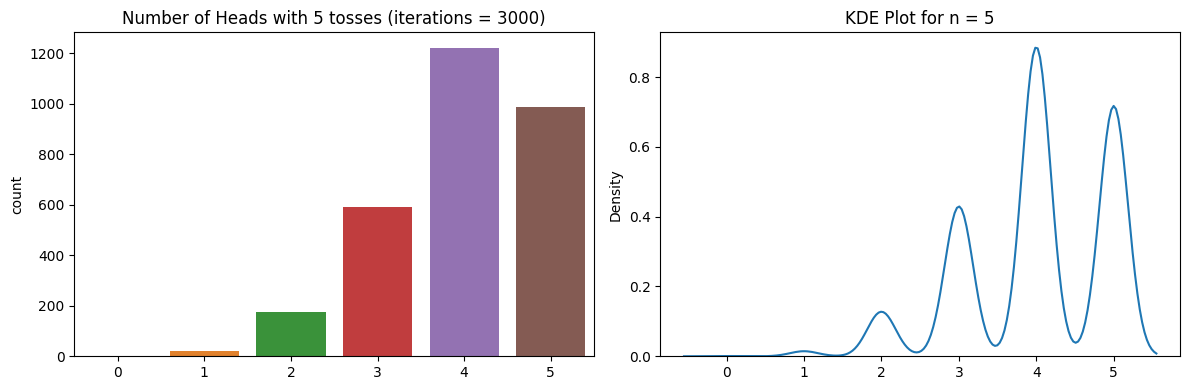

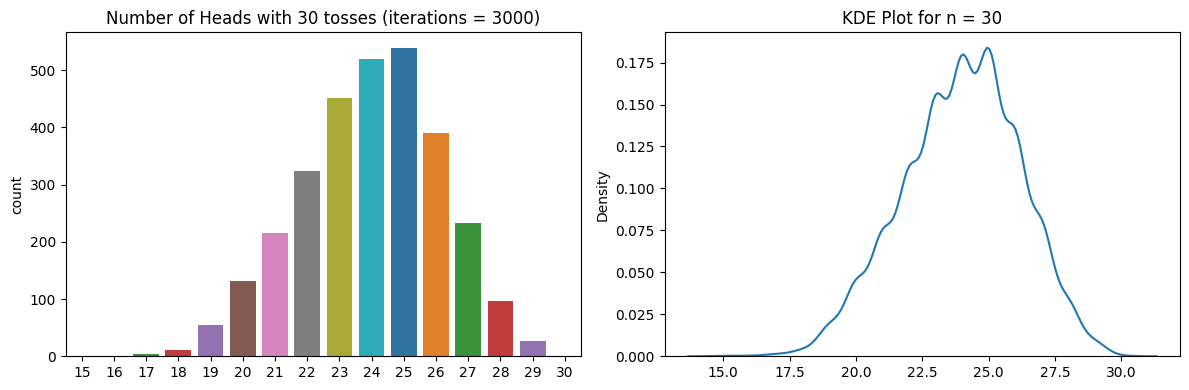

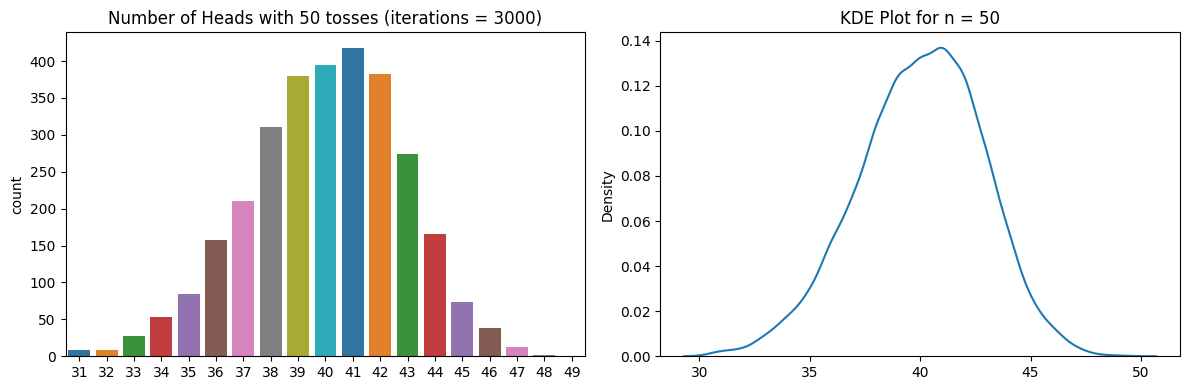

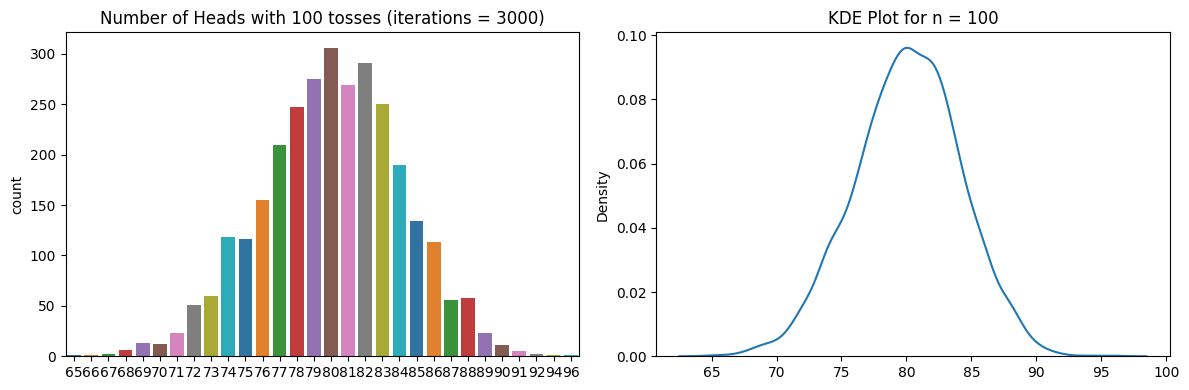

In [236]:
sample_sizes = [2,5,30,50,100]
iterations = 3_000

for n in sample_sizes:
    number_of_heads=[np.sum(np.random.choice(a=tosses,size=n,p=coin_probability)) for _ in range(iterations)]
    fig,axes=plt.subplots(1,2,figsize=(12,4))
    sns.countplot(x=number_of_heads,ax=axes[0],hue=number_of_heads,palette='tab10',legend=False)
    axes[0].set_title(f'Number of Heads with {n} tosses ({iterations = })')
    axes[1].set_title(f'KDE Plot for {n = }')
    sns.kdeplot(x=number_of_heads,ax=axes[1])
    plt.tight_layout()
    plt.show()
    

### Biased Coin - 2


P(Head) = 0.2

P(Tail) = 0.8

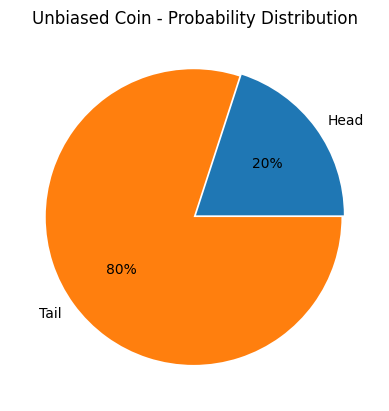

In [237]:
tosses = [1,0] # 1 --> H, 0 --> T
coin_probability = [0.2,0.8]

plt.pie(x=coin_probability, labels='Head Tail'.split(), autopct='%1.0f%%',explode=[0.01, 0.01])
plt.title('Unbiased Coin - Probability Distribution')
plt.show()

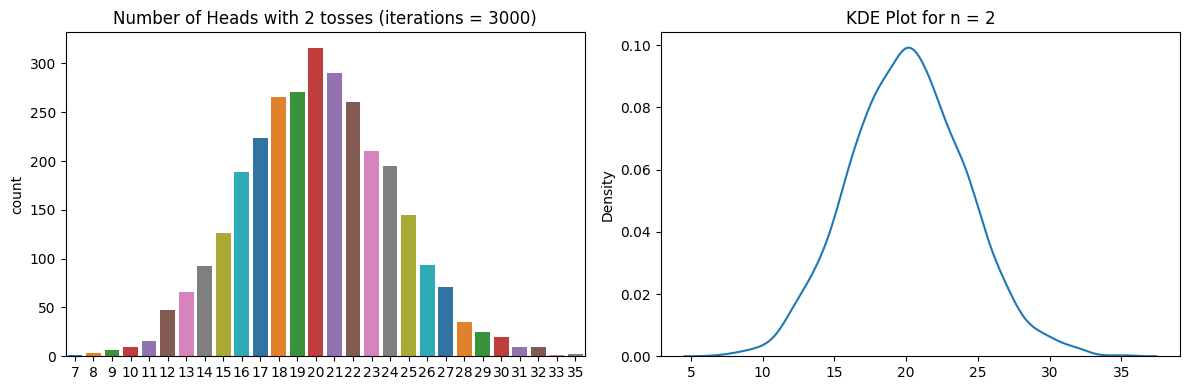

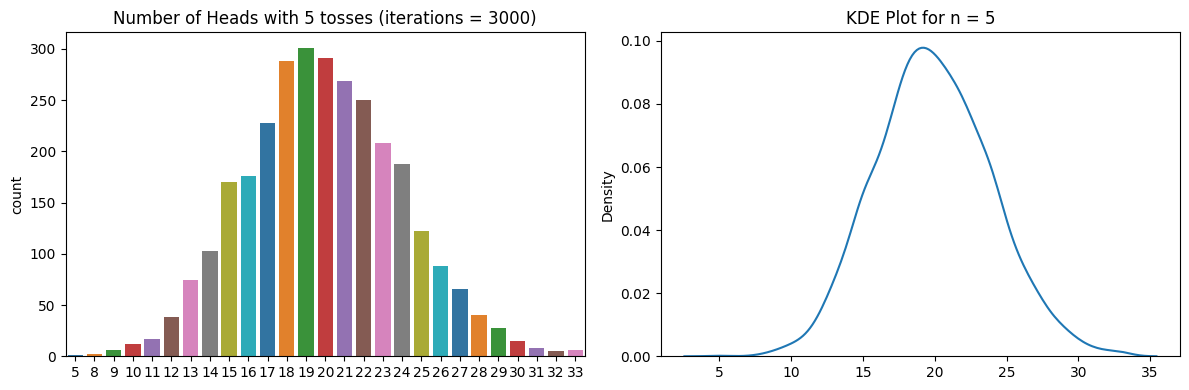

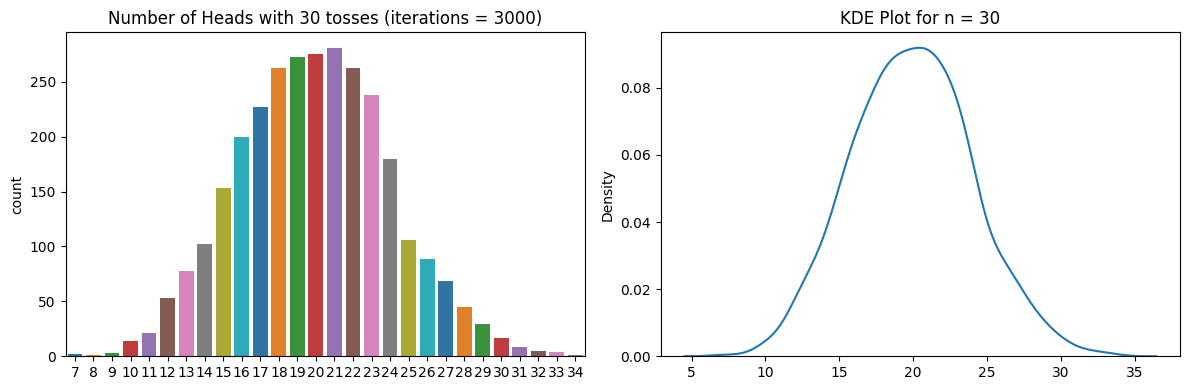

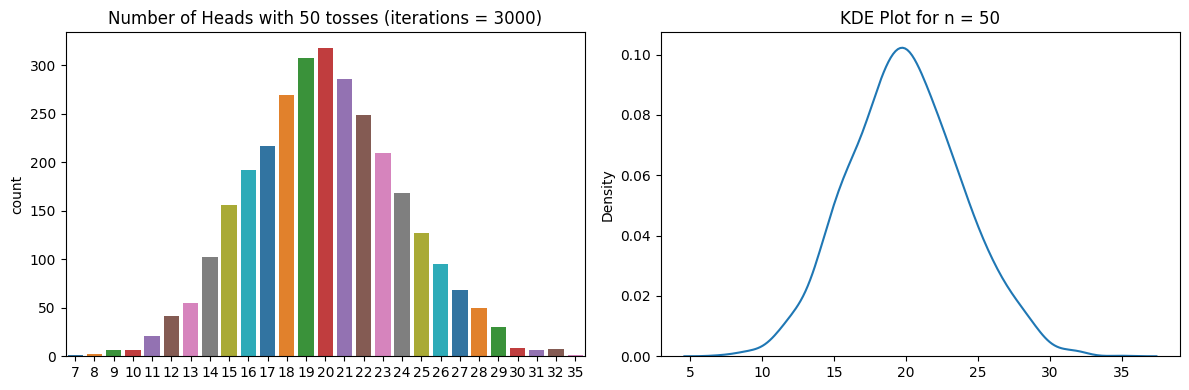

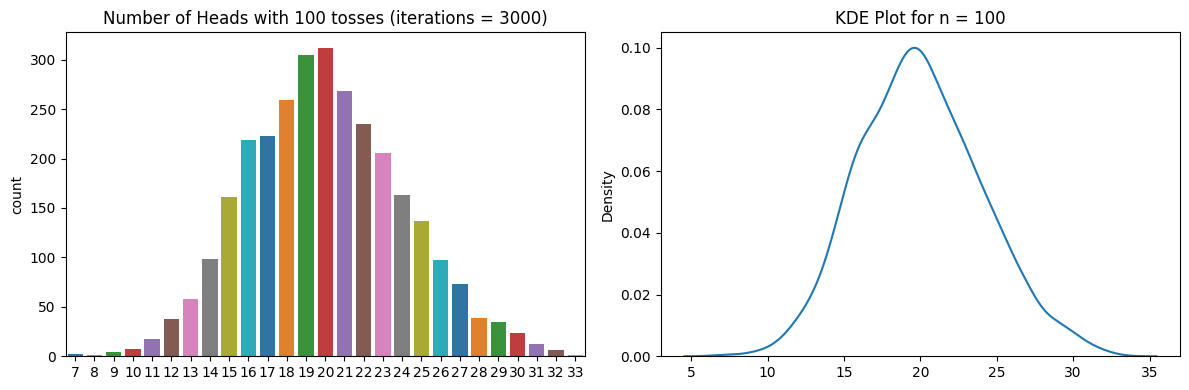

In [238]:
sample_sizes = [2,5,30,50,100]
iterations = 3_000

for n in sample_sizes:
    number_of_heads=np.array([np.sum(np.random.choice(a=tosses,size=N,p=coin_probability)) for _ in range(iterations)])
    fig,axes=plt.subplots(1,2,figsize=(12,4))
    sns.countplot(x=number_of_heads,ax=axes[0],hue=number_of_heads,palette='tab10',legend=False)
    axes[0].set_title(f'Number of Heads with {n} tosses ({iterations = })')
    axes[1].set_title(f'KDE Plot for {n = }')
    sns.kdeplot(x=number_of_heads,ax=axes[1])
    plt.tight_layout()
    plt.show()

As in the case of the die rolling, we see that indeed we have gaussian distribution arising as n increases. But just as we did in the earlier case, we will try to standardize the distributions and plot the distributions.

## Standardized Distributions

First we standardize and plot KDE and QQ plots for the unbiased coin.

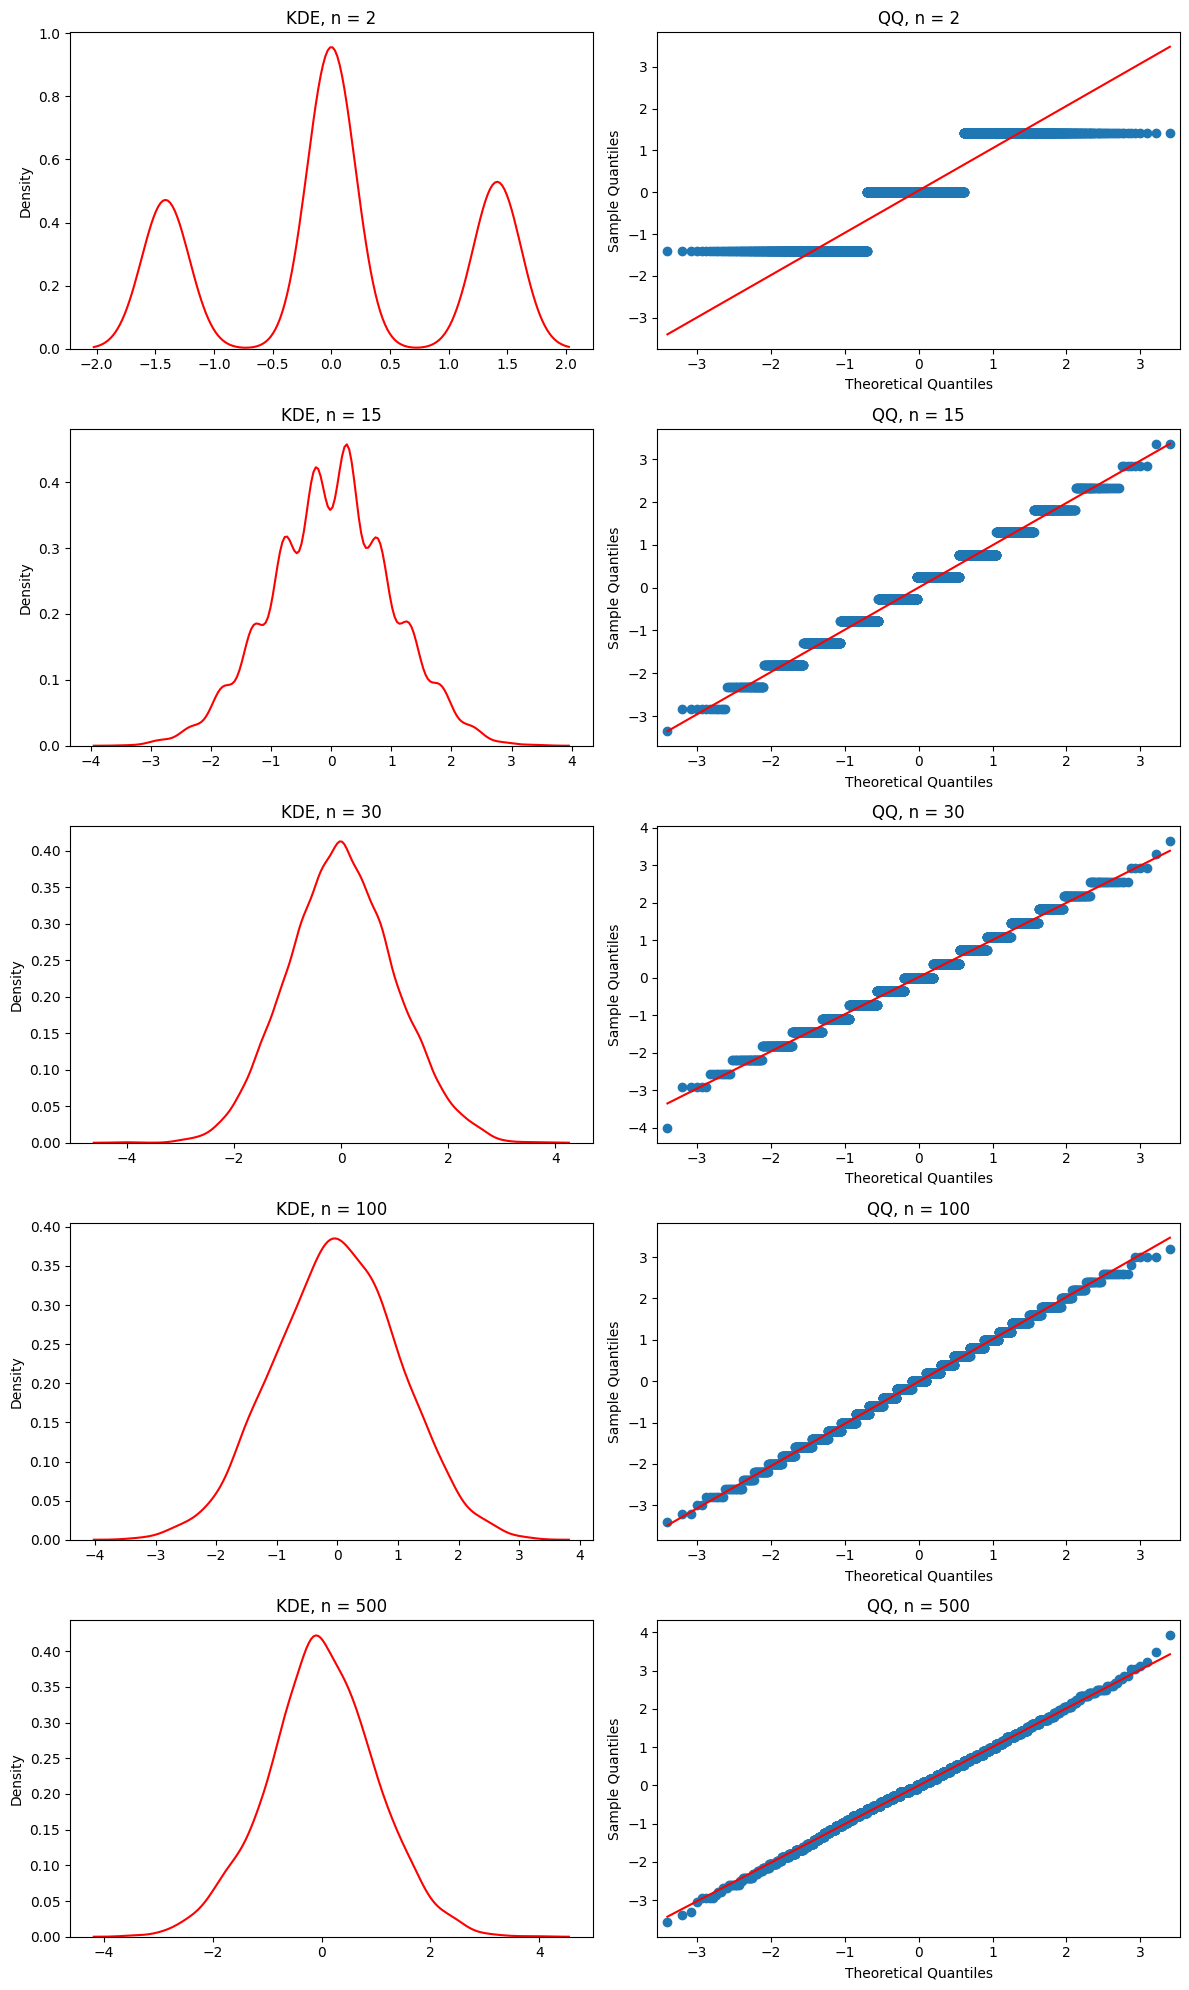

In [239]:
tosses = np.array([1,0]) # (1,0) --> (H,T)
coin_probability = np.array([0.5,0.5]) #pmf

mu=np.sum(tosses*coin_probability)
sigma=np.sqrt(np.sum((tosses-mu)**2*coin_probability))

iterations = 3_000
sample_sizes = np.array([2,15,30,100,500])

means=sample_sizes*mu
sigmas=np.sqrt(sample_sizes)*sigma

fig,axes=plt.subplots(len(sample_sizes),2,figsize=(12,4*len(sample_sizes)))

for i,n in enumerate(sample_sizes):
    number_of_heads=np.array([np.sum(np.random.choice(a=tosses,size=n,p=coin_probability)) for _ in range(iterations)])
    standardized_head_count=(number_of_heads-means[i])/sigmas[i]
    sns.kdeplot(x=standardized_head_count,ax=axes[i][0],color='r')
    sm.qqplot(standardized_head_count,line='s',ax=axes[i][1])
    axes[i][0].set_title(f'KDE, n = {n}')
    axes[i][1].set_title(f'QQ, n = {n}')

plt.tight_layout()
plt.show()

Now we plot for the biased cases:

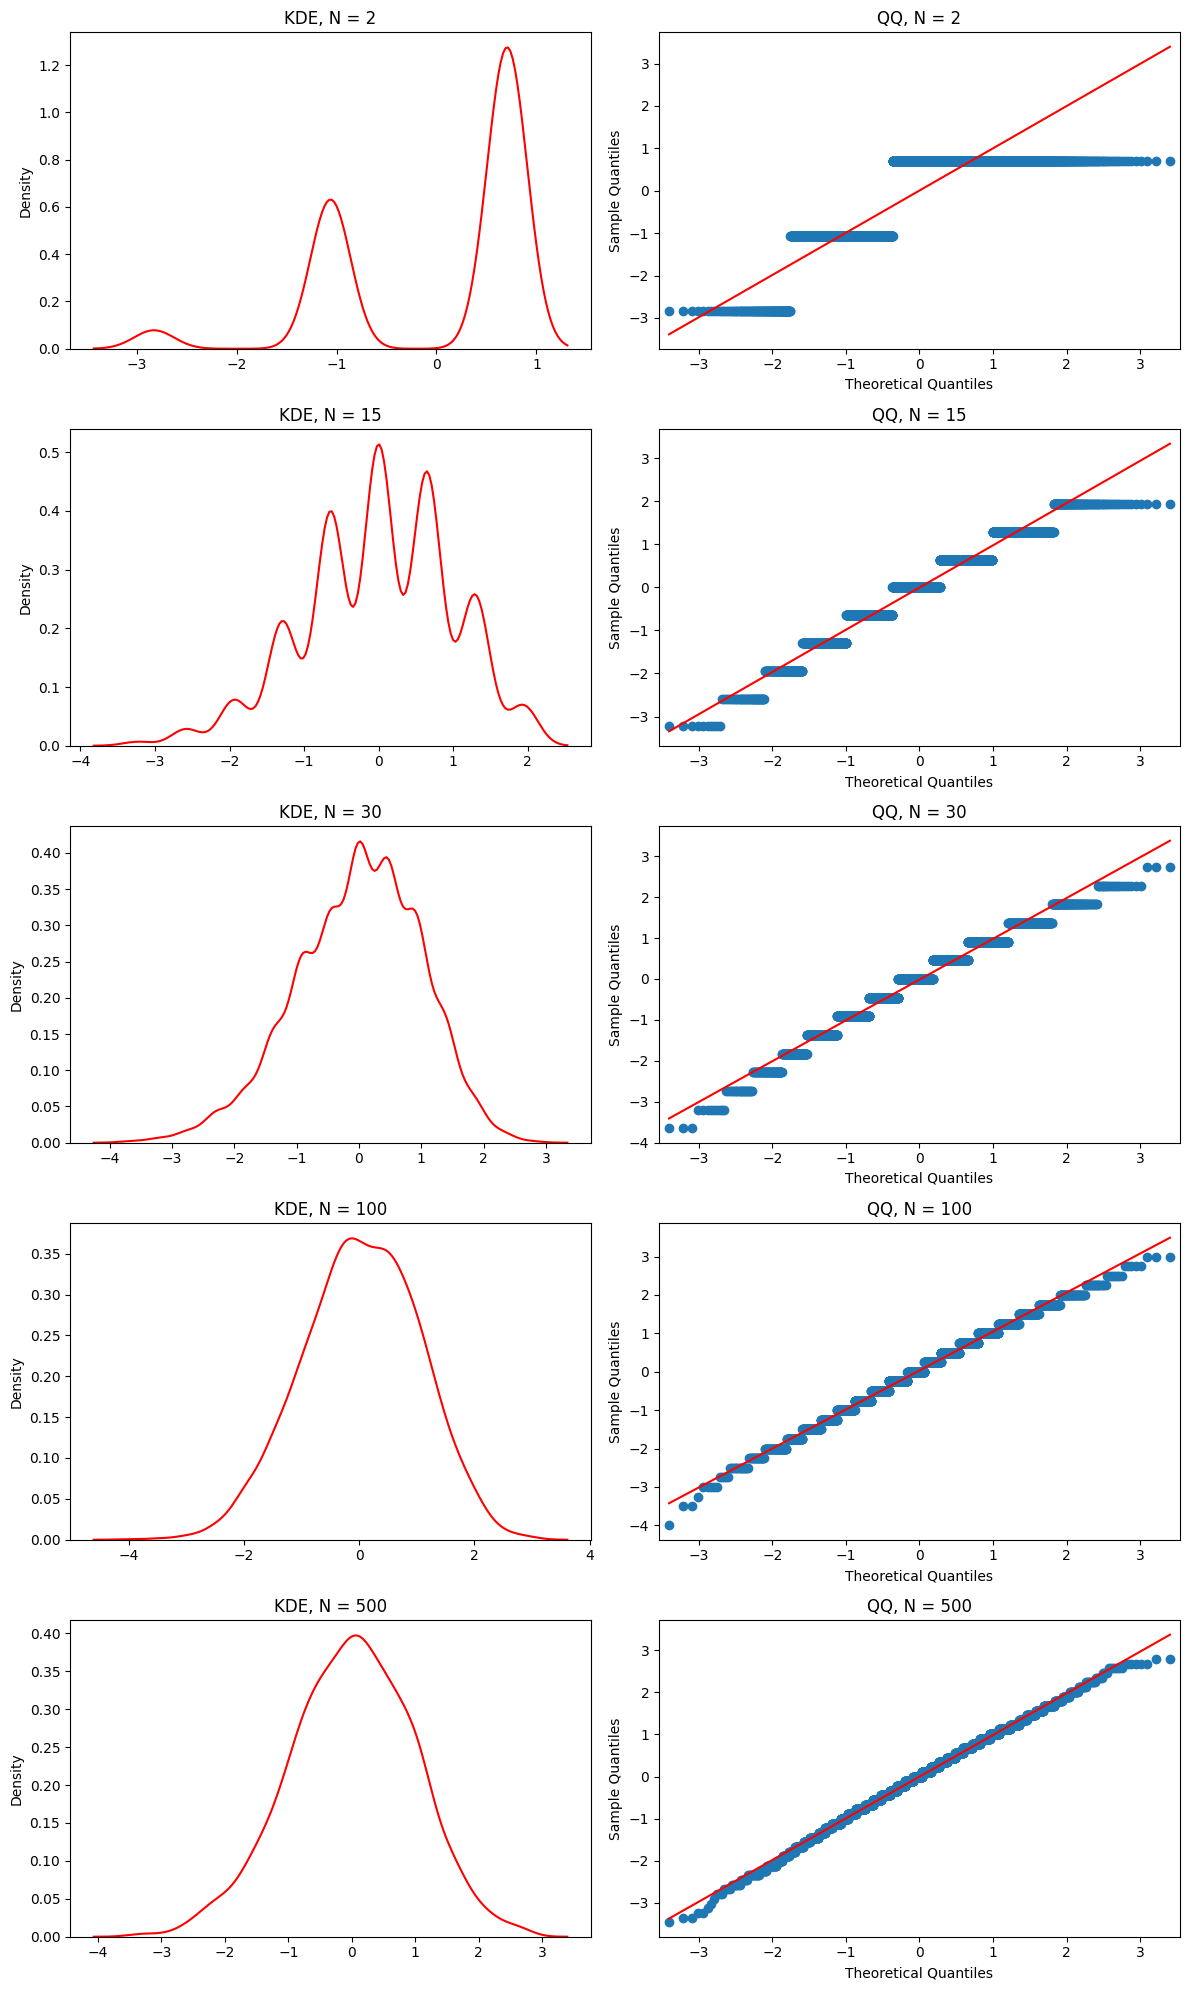

In [240]:
tosses = np.array([1,0]) # (1,0) --> (H,T)
coin_probability = np.array([0.8,0.2])

mu=np.sum(tosses*coin_probability)
sigma=np.sqrt(np.sum((tosses-mu)**2*coin_probability))

iterations = 3_000
sample_sizes = np.array([2,15,30,100,500])

means=sample_sizes*mu
sigmas=np.sqrt(sample_sizes)*sigma

fig,axes=plt.subplots(len(sample_sizes),2,figsize=(12,4*len(sample_sizes)))

for i,N in enumerate(sample_sizes):
    number_of_heads=np.array([np.sum(np.random.choice(a=tosses,size=N,p=coin_probability)) for _ in range(iterations)])
    standardized_head_count=(number_of_heads-means[i])/sigmas[i]
    sns.kdeplot(x=standardized_head_count,ax=axes[i][0],color='r')
    sm.qqplot(standardized_head_count,line='s',ax=axes[i][1])
    axes[i][0].set_title(f'KDE, N = {N}')
    axes[i][1].set_title(f'QQ, N = {N}')

plt.tight_layout()
plt.show()

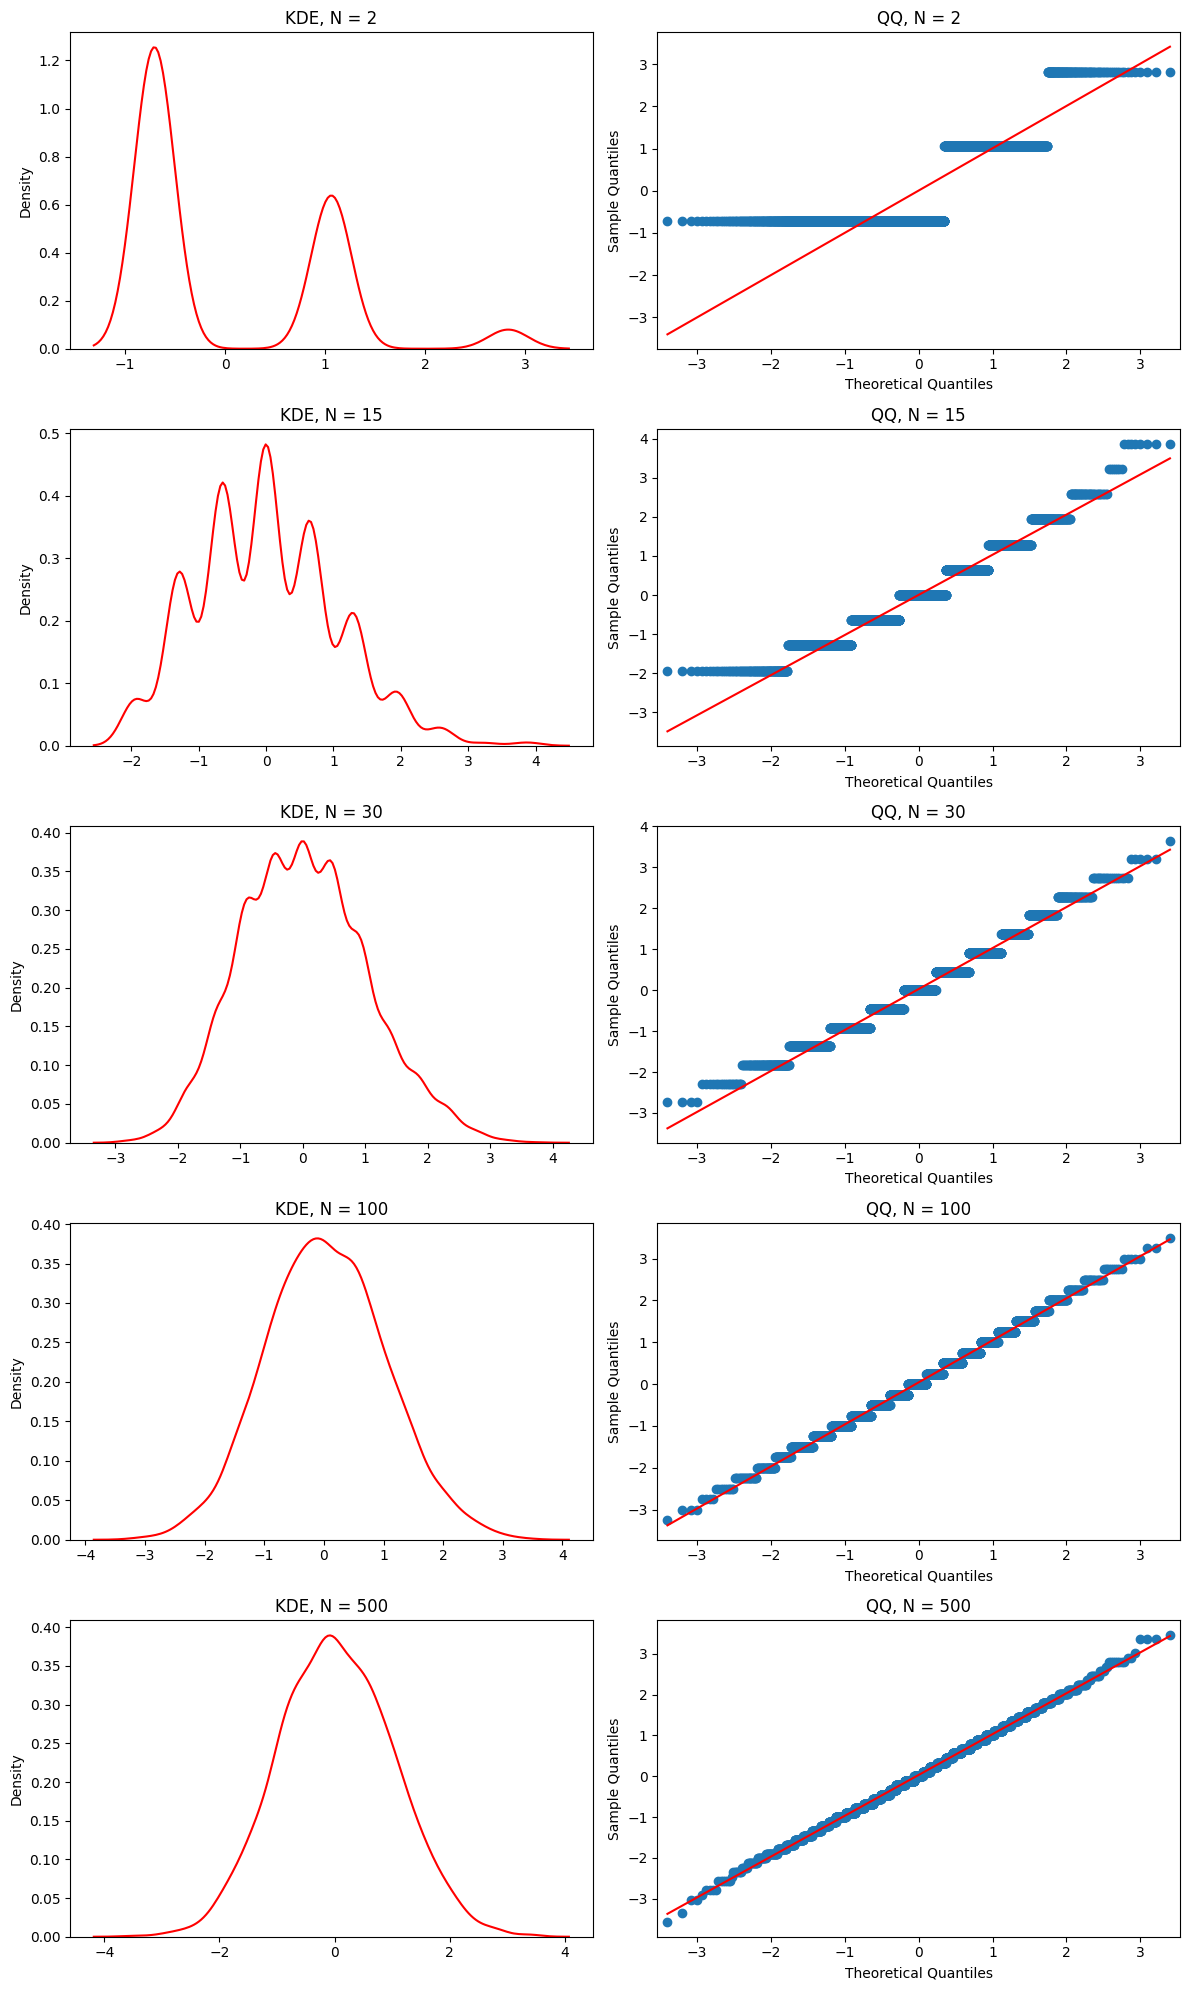

In [241]:
tosses = np.array([1,0]) 
coin_probability = np.array([0.2,0.8])

mu=np.sum(tosses*coin_probability)
sigma=np.sqrt(np.sum((tosses-mu)**2*coin_probability))

iterations = 3_000
sample_sizes = np.array([2,15,30,100,500])

means=sample_sizes*mu
sigmas=np.sqrt(sample_sizes)*sigma

fig,axes=plt.subplots(len(sample_sizes),2,figsize=(12,4*len(sample_sizes)))

for i,N in enumerate(sample_sizes):
    number_of_heads=np.array([np.sum(np.random.choice(a=tosses,size=N,p=coin_probability)) for _ in range(iterations)])
    standardized_head_count=(number_of_heads-means[i])/sigmas[i]
    sns.kdeplot(x=standardized_head_count,ax=axes[i][0],color='r')
    sm.qqplot(standardized_head_count,line='s',ax=axes[i][1])
    axes[i][0].set_title(f'KDE, N = {N}')
    axes[i][1].set_title(f'QQ, N = {N}')

plt.tight_layout()
plt.show()

In the case of the coin toss, we see that even at $n=100$, we are not seeing as clear adherence to normality as we were seeing at the similar sample size for the die rolling. However, we do clearly see that the distribution is approaching normality as $n$ increases. 

# 2. CLT for Sample Means

Till now, we were considering what happens if we have a sum of i.i.d. random variables and how that sum is distributed when we have large sample sizes. Now, we consider a slight variation of the same scenario. Instead of considering the sum, what if we consider the average of the random variable samples? Can we say anything about the distribution of those sample means?

As explained in the beginning, CLT works here as well. Let's see it in action through some simulations.

## Dice Roll Simulation

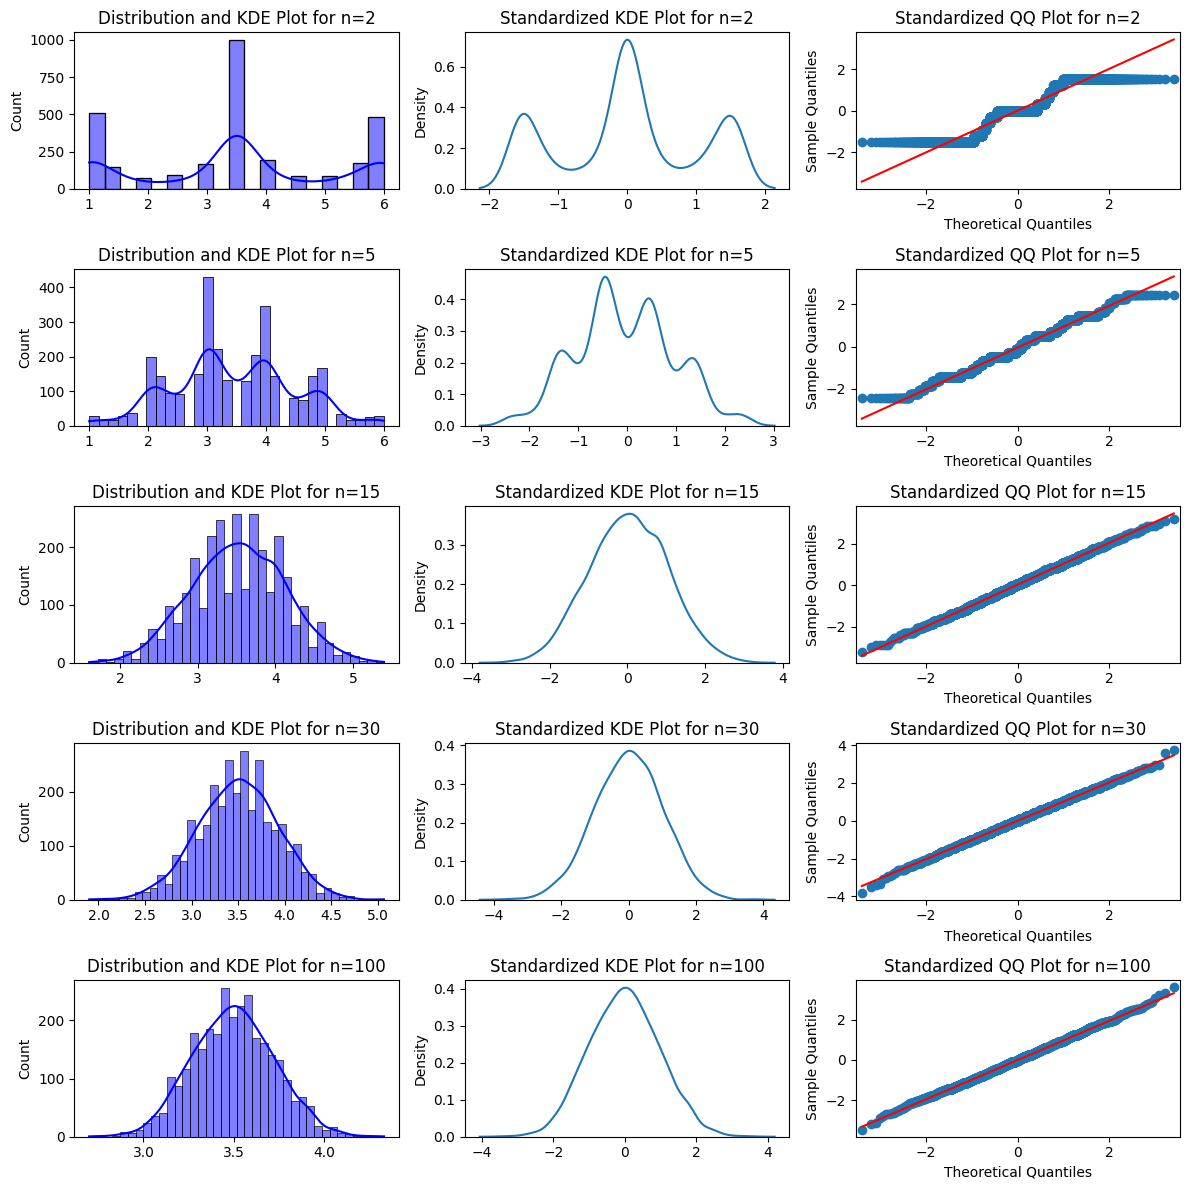

In [242]:
rolls=np.arange(1,7,dtype='int') # possible values for each roll
# rolls_probability=np.array([1/6]*6) # uniform probability mass function
# rolls_probability=np.array([0.41,0.25,0.15,0.1,0.06,0.03]) # biased pmf:1 
rolls_probability=np.array([0.40,0.07,0.03,0.03,0.07,0.4]) # biased pmf:2

mu=np.sum(rolls*rolls_probability)
single_roll_variance=np.sum((rolls-mu)**2*rolls_probability)
sigma = np.sqrt(single_roll_variance)

sample_sizes=np.array([2,5,15,30,100])
means=sample_sizes*mu
iterations=3000
fig,axes=plt.subplots(len(sample_sizes),3,figsize=(12, 12))
for i,n in enumerate(sample_sizes):
    means=np.array([np.random.choice(a=rolls,size=n,p=rolls_probability).sum()/n for _ in range(iterations)])
    standardized_means=(means-mu)/(sigma/np.sqrt(n))
    axes[i][0].set_title(f"Distribution and KDE Plot for n={n}")
    sns.histplot(x=means,kde=True,legend=False, ax=axes[i][0],color='b')
    axes[i][1].set_title(f"Standardized KDE Plot for n={n}")
    sns.kdeplot(x=standardized_means,ax=axes[i][1])
    axes[i][2].set_title(f"Standardized QQ Plot for n={n}")
    sm.qqplot(standardized_means,ax=axes[i][2],line='s')
    
plt.tight_layout()
plt.show()

As in the case of the distribution of sums, we see that the gaussian behaviour is seen beyond n>=30.

## Coin Toss Simulation

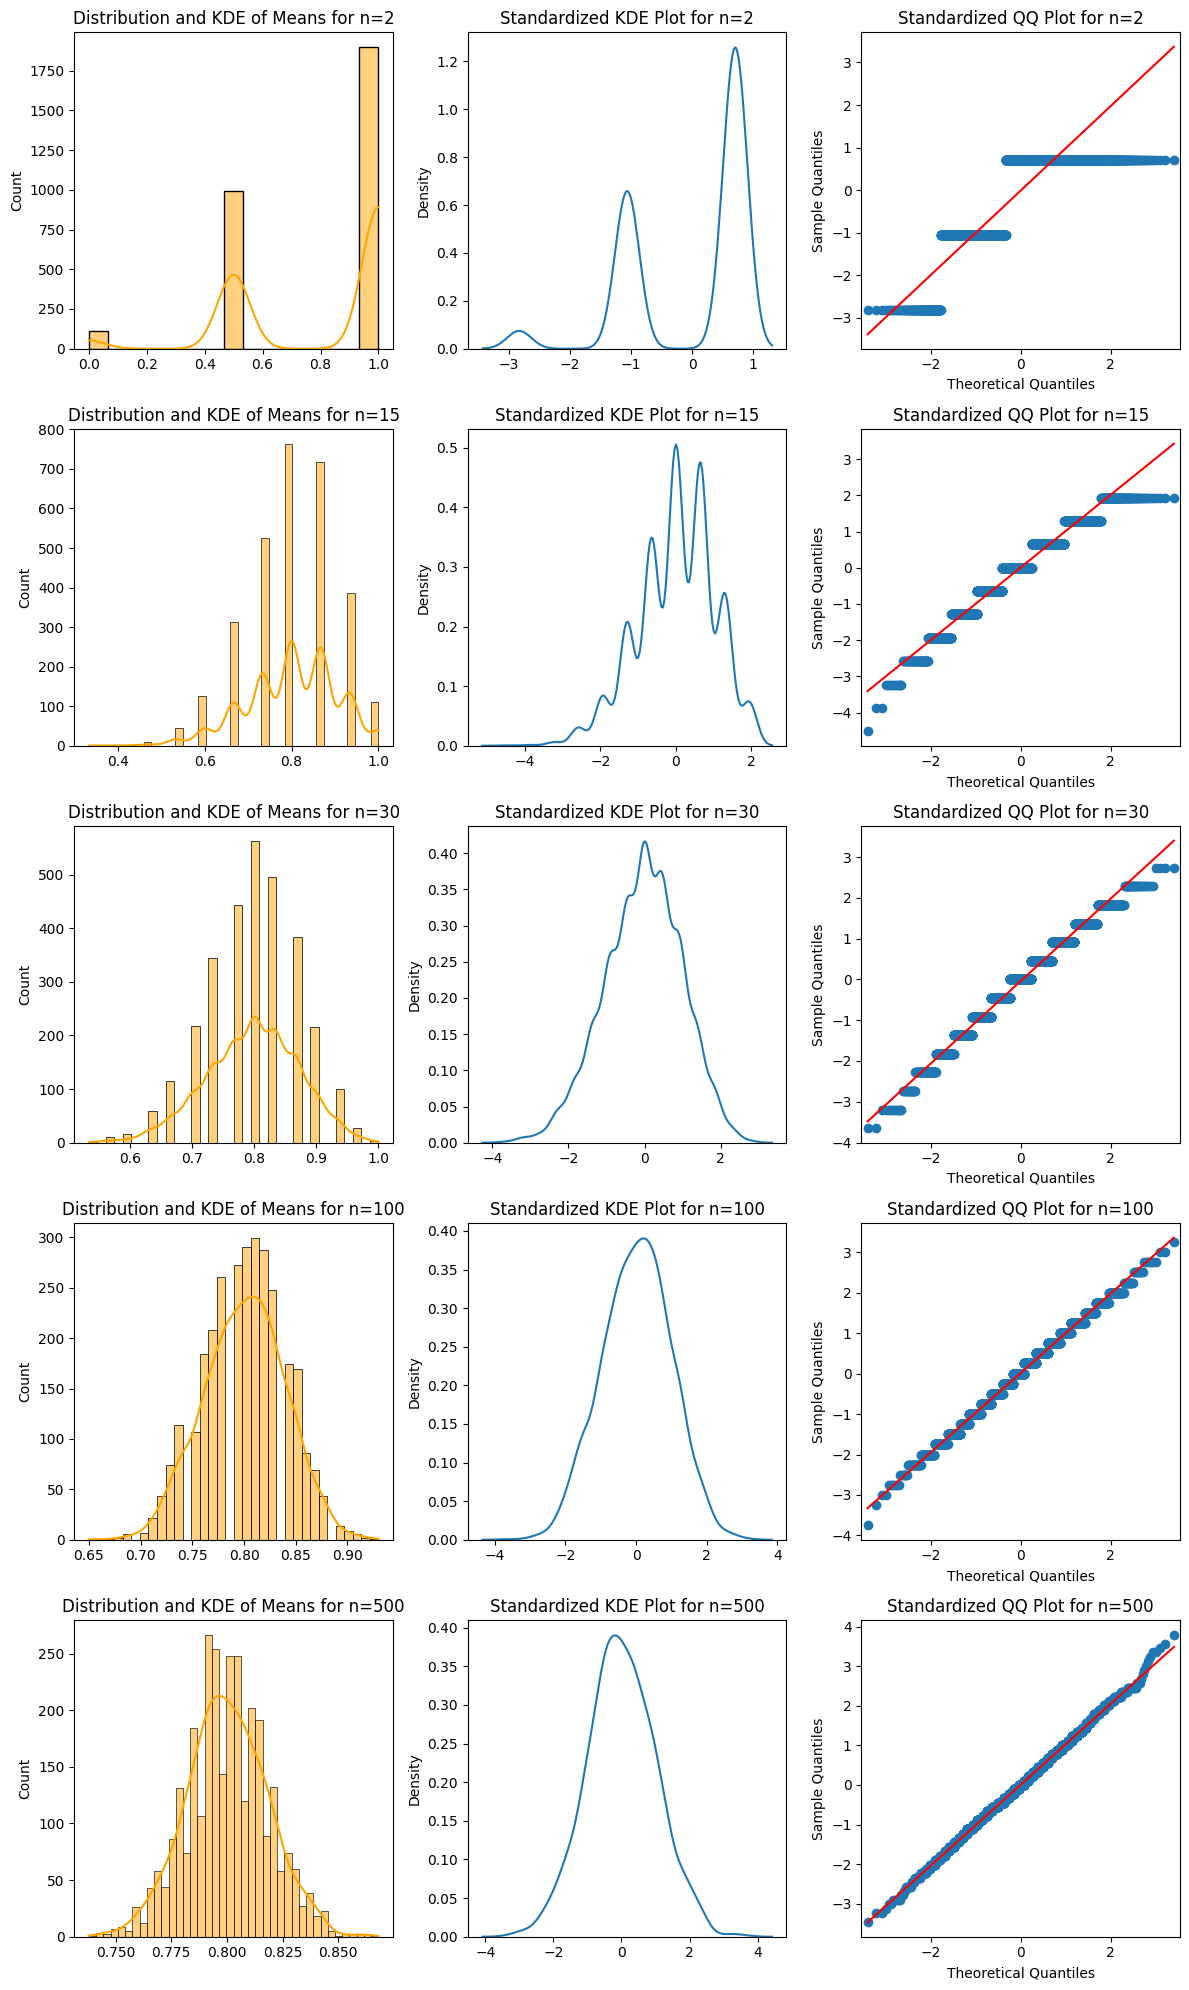

In [243]:
tosses = np.array([1,0]) # 1 --> H, 0 --> T
# coin_probability = np.array([0.5]*2) # uniform probability mass function
coin_probability = np.array([0.8,0.2]) # biased pmf:1
# coin_probability = np.array([0.2,0.8]) # biased pmf:2
mu=np.sum(tosses*coin_probability)
sigma=np.sqrt(np.sum((tosses-mu)**2*coin_probability))

iterations = 3_000
sample_sizes = np.array([2,15,30,100,500])

means=sample_sizes*mu
sigmas=sigma/np.sqrt(sample_sizes)

fig,axes=plt.subplots(len(sample_sizes),3,figsize=(12,4*len(sample_sizes)))
for i,n in enumerate(sample_sizes):
    mean_number_of_heads=np.array([np.sum(np.random.choice(a=tosses,size=n,p=coin_probability))/n for _ in range(iterations)])
    standardized_mean_head_count=(mean_number_of_heads-mu)/(sigma/np.sqrt(n))
    sns.histplot(x=mean_number_of_heads,ax=axes[i][0],legend=False,kde=True,color='orange')
    axes[i][0].set_title(f'Distribution and KDE of Means for n={n}')
    axes[i][1].set_title(f'Standardized KDE Plot for n={n}')
    axes[i][2].set_title(f'Standardized QQ Plot for n={n}')
    sns.kdeplot(x=standardized_mean_head_count,ax=axes[i][1])
    sm.qqplot(standardized_mean_head_count,ax=axes[i][2],line='s')
    
plt.tight_layout()
plt.show()

We see that normality emerges even in this scenario!